# 1. Perkenalan

- Nama        : Sanggeni Gali Wardhana
- Batch       : FTDS-011
- Dataset     : Credit-card-information
- Objective   : Credit card customer clustering

**GC 4**

- **QUERY SQL**

select *
from `ftds-hacktiv8-project.phase1_assignments.credit-card-information` 
WHERE mod(CUST_ID,2) <> 0;

- CUST_ID :	
Identification of Credit Card holder	
- BALANCE :		
Balance amount left in their account to make purchases	
- BALANCE_FREQUENCY :		
How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)	
- PURCHASES	:
Amount of purchases made from account	
- ONEOFF_PURCHASES :		
Maximum purchase amount done in one-go	
- INSTALLMENTS_PURCHASES :		
Amount of purchase done in installment	
- CASH_ADVANCE :
Cash in advance given by the user	
- PURCHASES_FREQUENCY :		
How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)	
- ONEOFF_PURCHASES_FREQUENCY :		
How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)	
- PURCHASES_INSTALLMENTS_FREQUENCY :		
How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)	
- CASH_ADVANCE_FREQUENCY :		
How frequently the cash in advance being paid	
- CASH_ADVANCE_TRX :
Number of Transactions made with 'Cash in Advanced'	
- PURCHASES_TRX	:
Numbe of purchase transactions made	
- CREDIT_LIMIT :		
Limit of Credit Card for user	
- PAYMENTS :
Amount of Payment done by user	
- MINIMUM_PAYMENTS :		
Minimum amount of payments made by user	
- PRC_FULL_PAYMENT	:
Percent of full payment paid by user	
- TENURE :	
Tenure of credit card service for user

Objective yang ditentukan adalah :

- **Membuat model unsupervised learning untuk clustering perilaku pengguna kartu kredit dari client bank**

---
# 2. Import Library

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

from feature_engine.outliers import Winsorizer

from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings("ignore")


import pickle
import ast

---
# 3. Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1G4_Sanggeni_Gali_Wardhana.csv')
pd.set_option('display.max_columns', None)
data.head(5)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   
4     7755  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

In [3]:
data.tail(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     2345  9629.808851                1.0        0.0               0.0   
4471     6785  1040.030221                1.0        0.0               0.0   
4472     7347  1322.818587                1.0        0.0               0.0   
4473     8447  1060.391273                1.0        0.0               0.0   
4474     1995  3447.674222                1.0      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035.627320        312.835530               0.0      11  
4473   407.360560        277.084736               0.0      11  
4474   665.239171        817.844662               0.0      11

In [4]:
data_copy=data.copy()

Code diatas adalah step untuk melakukan load data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Berdasarkan data.info() diatas, terdapat total 18 kolom dengan 4475 row pada setiap kolomnya.
- Terdapat 155 missing value di kolom MINIMUM_PAYMENTS.

In [7]:
data.describe().T

count         mean          std        min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.000000   
BALANCE                           4475.0  1563.205717  2072.045789   0.000000   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.000000   
PURCHASES                         4475.0  1003.251343  2060.034730   0.000000   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.000000   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.000000   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.000000   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.000000   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.000000   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.000000   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.000000   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.000000   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.000000   
MINIMUM_PAYMENTS                  4320.0   873.976757  2436.877272   0.019163   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.000000   
TENURE                            4475.0    11.518212     1.328925   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   168.590144   313.980229   819.371080   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

- Berdasarkan deskripsi data diatas, terlihat cukup banyak outliers pada keseluruhan kolom, seperti yang terjadi di kolom balance, oneoff_purchases, cash_advannce_trx, dan beberapa data lainnya.

---
# 4. Exploratory Data Analysis (EDA)

In [8]:
data.head(4)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8

In [9]:
data_columns = data[['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

**Cek Distribusi data**

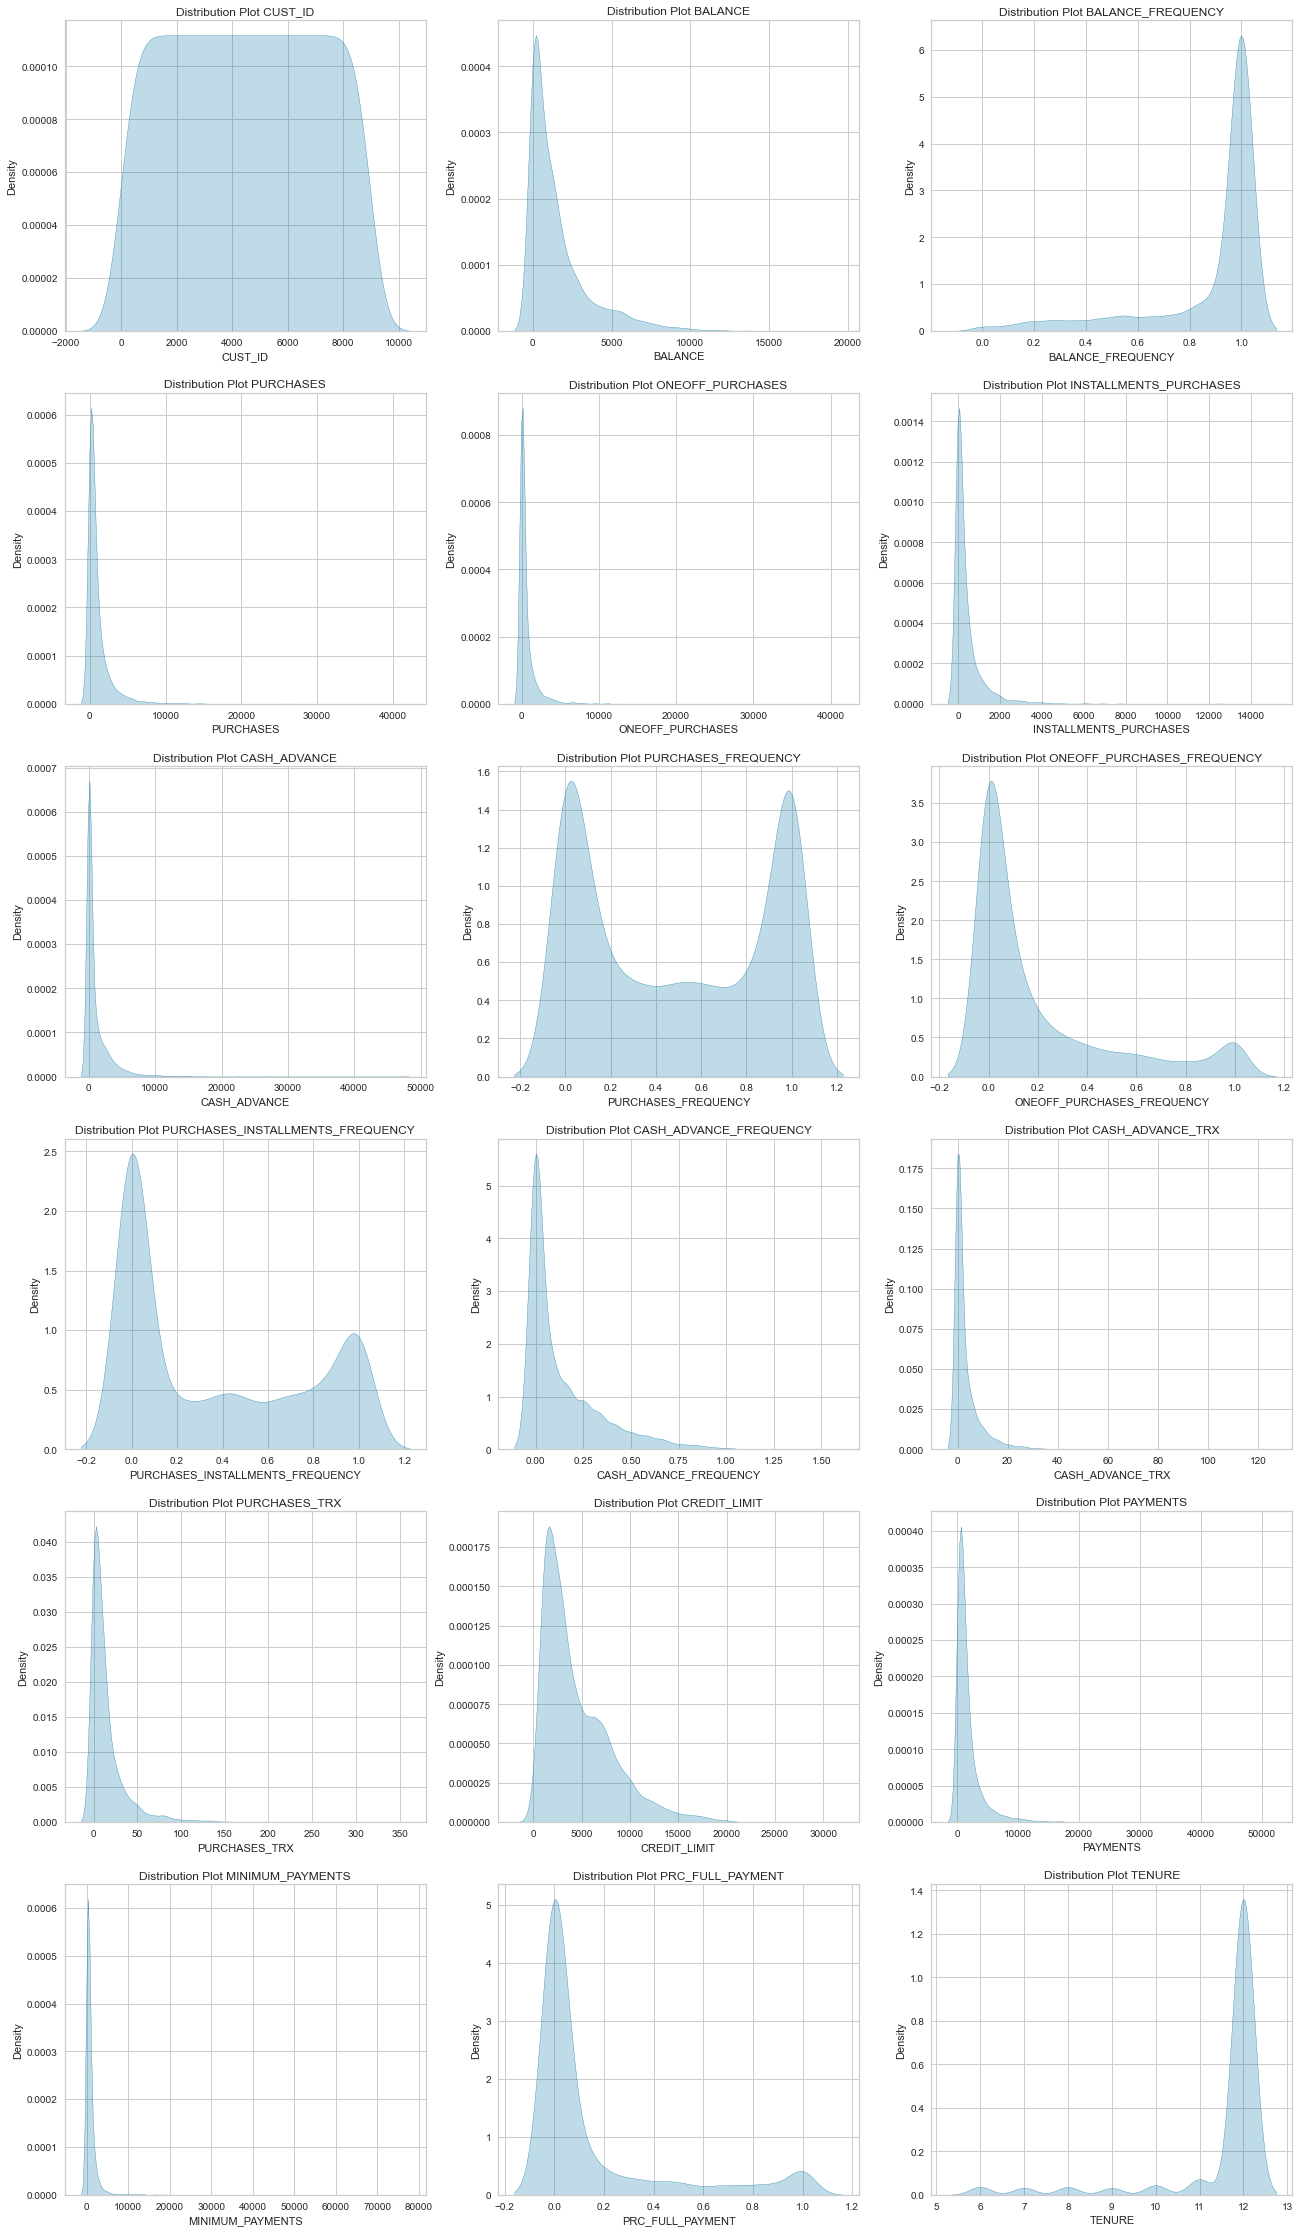

In [10]:
fig,axes=plt.subplots(nrows=6,ncols=3,figsize=(22,40))
i=0
j=0
for col in data_columns.columns:
    sns.kdeplot(data=data_columns, x=col, fill=True,ax=axes[i][j]).set(title='Distribution Plot '+col)
    j+=1
    if j>2:
        i+=1
        j=0
    if i==6:
        break

- Pada keseluruhan data, setiap kolom memiliki outliers.
- terdapat 2 peak pada kolom PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.
- Terdapat 2 data yang memiliki distribusi normal yaitu PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.
- Berdasarkan plot distribusi diatas, dapat dilihat bahwa mayoritas kolom memiliki tipe distribusi yang skew.

**Pairplot all Data**

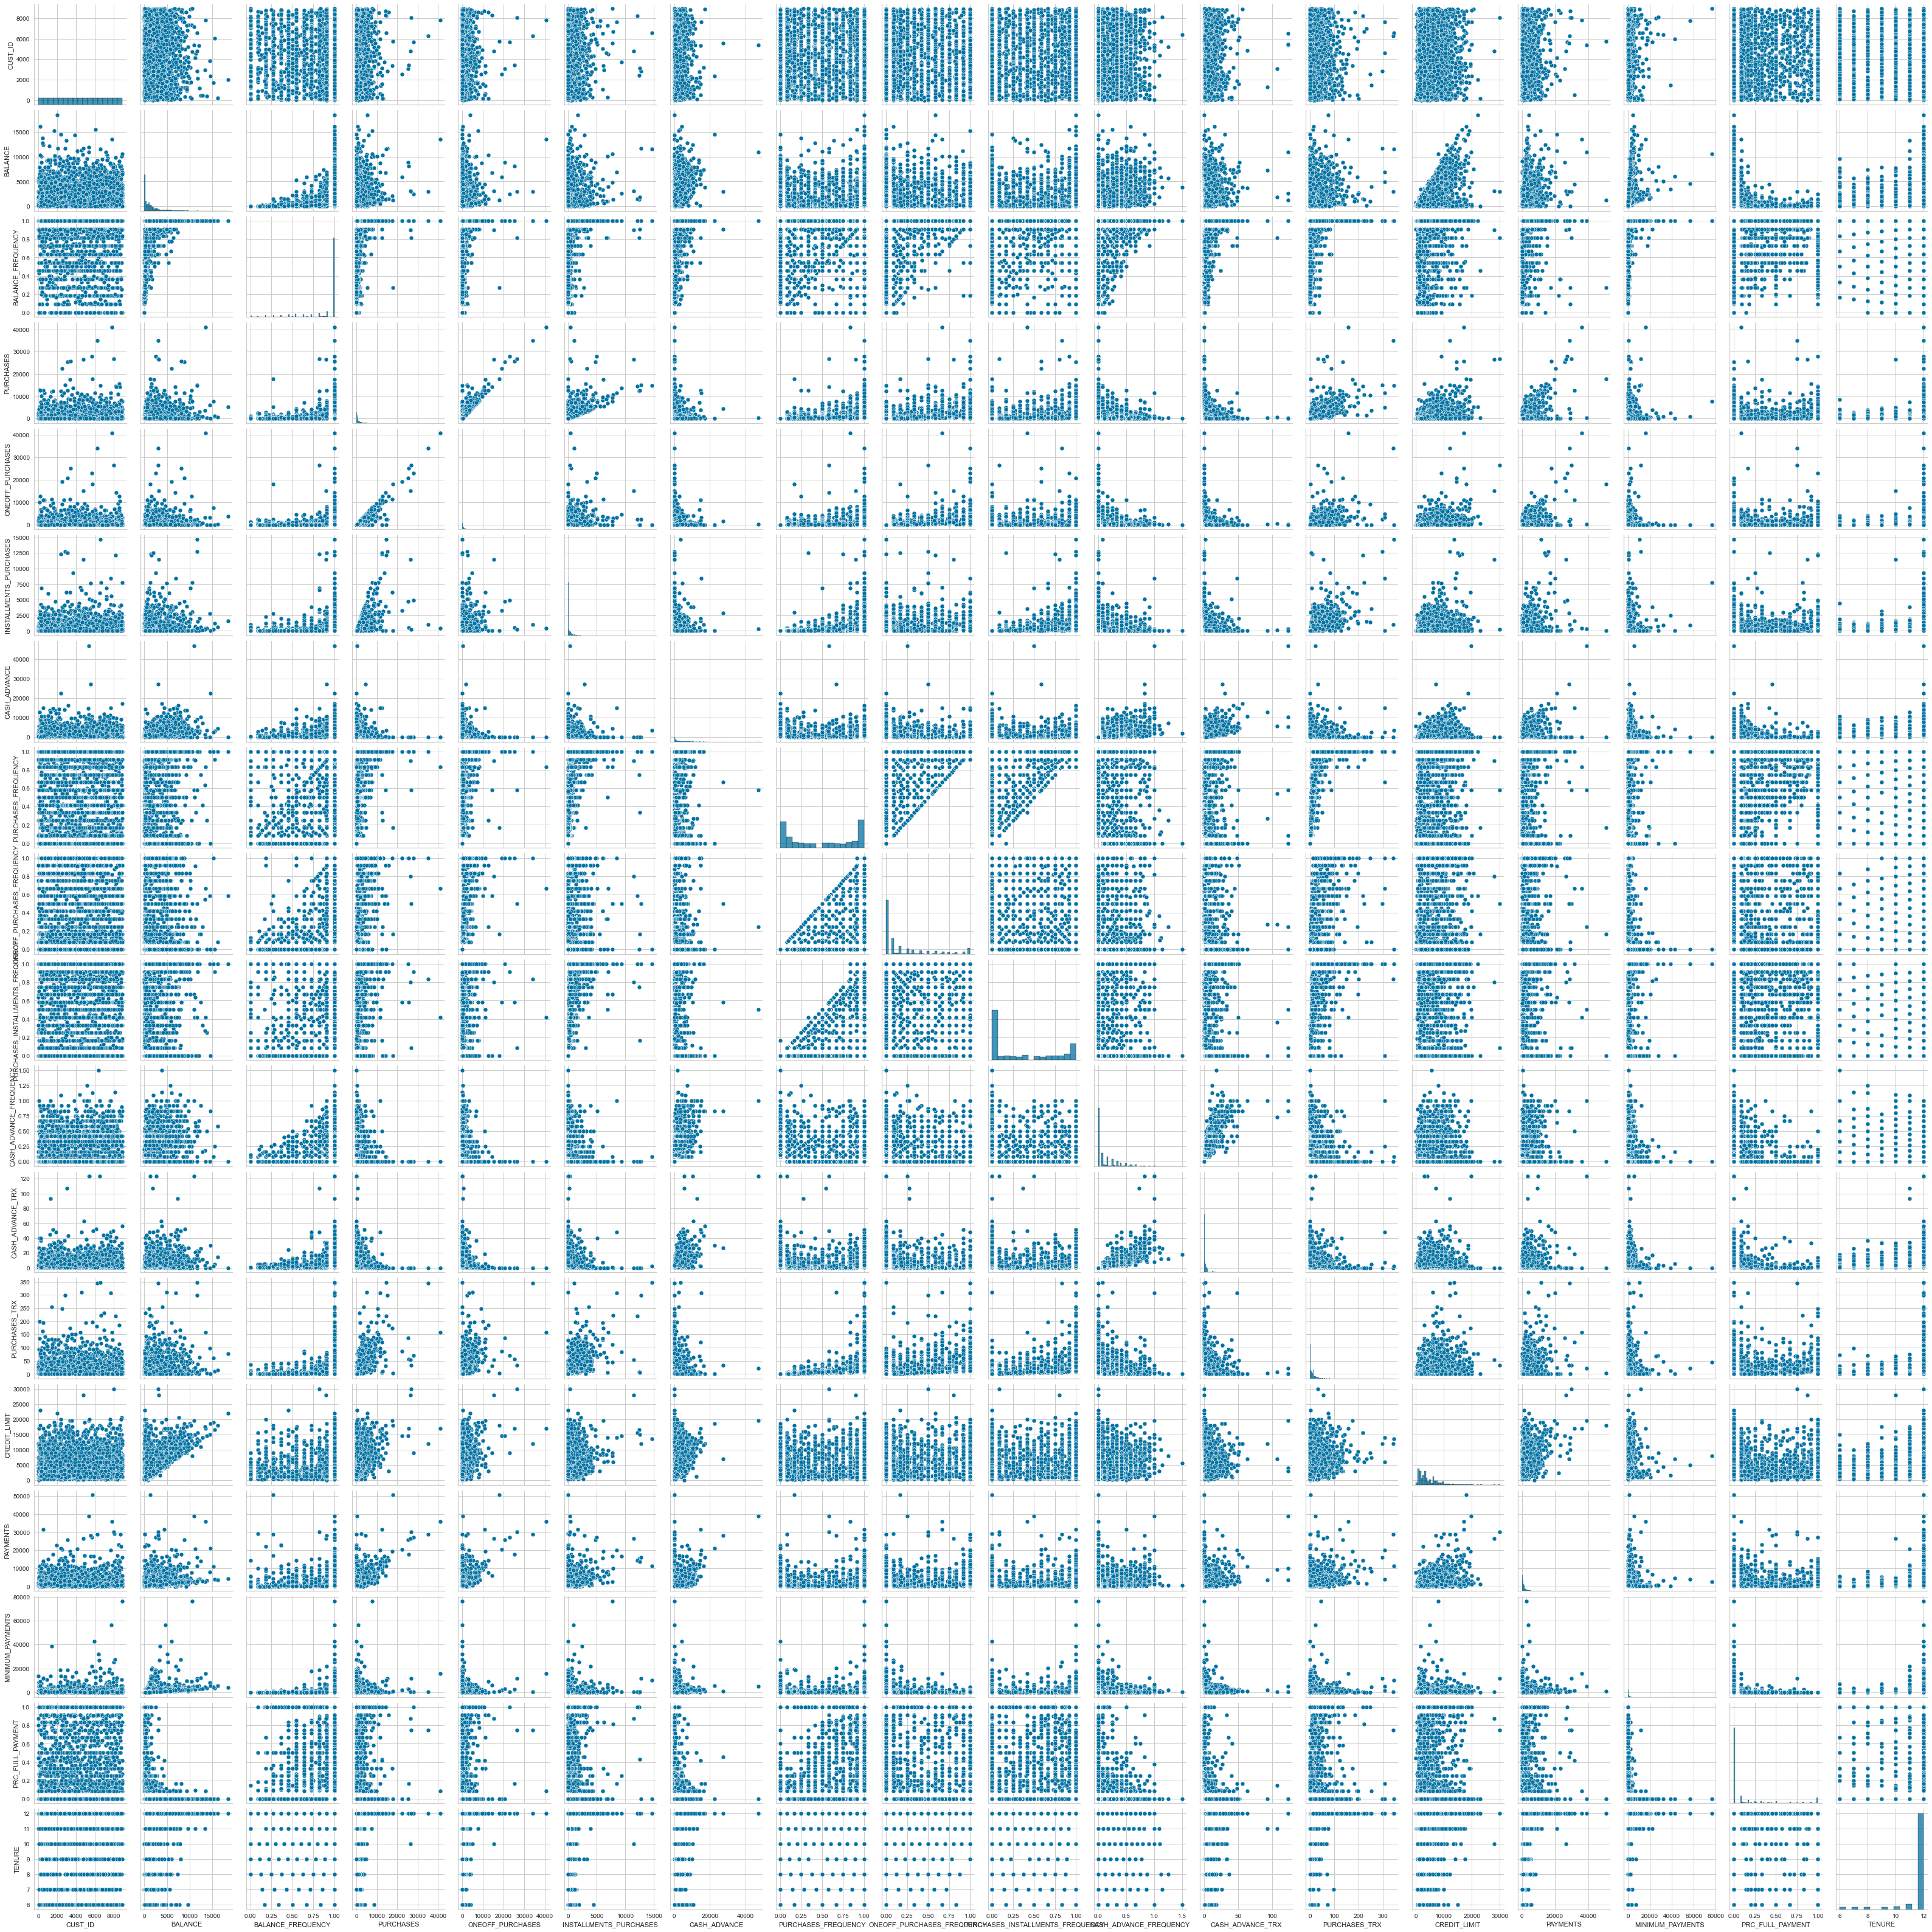

In [11]:
sns.pairplot(data=data)

karena terdapat kolom yang cukup banyak, saya memutuskan untuk membuat pairplot seperti gambar diatas dan memilih beberapa data yang berkorelasi untuk dilakukan analisa.

**hubungan oneoff_purchase, purchase, dan installments_purchases ?**

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES', ylabel='PURCHASES'>

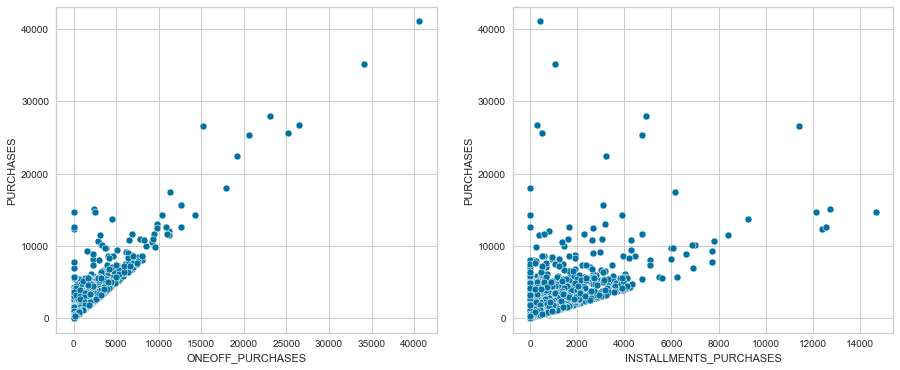

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES')
plt.subplot(122)
sns.scatterplot(data=data, x='INSTALLMENTS_PURCHASES', y='PURCHASES')


- Semakin tinggi Jumlah pembelian maksimum dilakukan dalam sekali jalan (oneoff_purchases), nilai Jumlah pembelian yang dilakukan dari akun (Purchase) semakin tinggi
- jika nilai jumlah pembelian yang dilakukan secara diangsur semakin tinggi, maka jumlah pembelian pada akun semakin tinggi.

**Cek bagaimana hubungan tenure dengan credit limit, jumlah pembelian, dan pembayaran kartu kredit.**

<AxesSubplot:xlabel='TENURE', ylabel='PAYMENTS'>

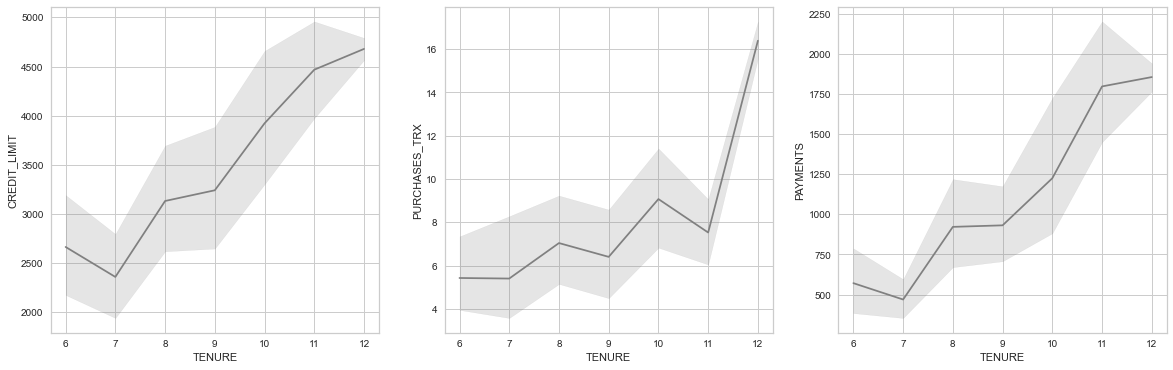

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(131)
# counts = data[]
sns.lineplot(data=data, x='TENURE', y='CREDIT_LIMIT', color='grey')

plt.subplot(132)
sns.lineplot(data=data, x='TENURE', y='PURCHASES_TRX', color='grey')

plt.subplot(133)
sns.lineplot(data=data, x='TENURE', y='PAYMENTS', color='grey')

- Semakin lama tenure atau masa penggunaan kartu kredit pengguna, maka trend dari credit limit, purchases_trx, dan payments(pembayaran) juga akan semakin tinggi.

---
# 5. Data Preprocessing

## 5.1 Mengambil data untuk model inference

Mengambil sample acak inference

In [14]:
data_inf = data.sample(5, random_state=20)
data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1504      735    26.485924           1.000000     256.44              0.00   
4184     6241  2571.311375           1.000000       0.00              0.00   
2299     5099   347.226798           1.000000    1535.49           1203.69   
406       913     9.074142           0.888889     555.66              0.00   
1613      363    93.964086           1.000000     815.34            149.04   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1504                  256.44      0.000000             0.666667   
4184                    0.00   6537.278532             0.000000   
2299                  331.80      0.000000             0.900000   
406                   555.66      0.000000             1.000000   
1613                  666.30      0.000000             0.916667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1504                        0.00                          0.666667   
4184                        0.00                          0.000000   
2299                        0.50                          0.500000   
406                         0.00                          0.888889   
1613                        0.25                          0.750000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1504                0.000000                 0             12        1500.0   
4184                0.583333                16              0        3000.0   
2299                0.000000                 0             24        1000.0   
406                 0.000000                 0              9        1500.0   
1613                0.000000                 0             14        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1504   235.328971        162.324595          0.166667      12  
4184  4513.686142        583.336071          0.100000      12  
2299   778.913464        149.966517          0.250000      10  
406    547.194469          2.167809          0.000000       9  
1613   361.786239        125.693866          0.300000      12

Inference set Removal

In [15]:
# Remove Inference Set
data_for_train_test = data.drop(data_inf.index)
data_for_train_test.head()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   
4     7755  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

Reset index dari Inference set

In [16]:
data_for_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [17]:
data = data_for_train_test

## 5.3 Handling Missing Value

In [18]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Untuk mengatasi outliers yang terdapat pada kolom MINIMUM_PAYMENTS (155 row), digunakan imputation menggunakan nilai median, karena data tedistribusi tidak normal (skew)

In [19]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

In [20]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sekarang data telah terbebas dari missing value, sehingga dapat dilakukan handling outliers dengan metode capping (winsorizer)

## 5.4 Handling outliers

Pada script dibawah ini akan dilakukan cek jenis distribusi data

In [21]:
num_skewness = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
normdis = []
skewdis = []
for iz in num_skewness :
    skewness = data[iz].skew()
    print('Skewness of', iz, "=" ,skewness)
    print(30*"==")
    if skewness<0.5 and skewness>-0.5 :
        normdis.append(iz)
    else:
        skewdis.append(iz)

Skewness of BALANCE = 2.3281646429567435
Skewness of BALANCE_FREQUENCY = -2.024828366761074
Skewness of PURCHASES = 7.068351686527609
Skewness of ONEOFF_PURCHASES = 9.94685945985425
Skewness of INSTALLMENTS_PURCHASES = 6.327714385058141
Skewness of CASH_ADVANCE = 5.646680574009157
Skewness of PURCHASES_FREQUENCY = 0.05997962013199153
Skewness of ONEOFF_PURCHASES_FREQUENCY = 1.5480997269911598
Skewness of PURCHASES_INSTALLMENTS_FREQUENCY = 0.5097406781577016
Skewness of CASH_ADVANCE_FREQUENCY = 1.834850326551549
Skewness of CASH_ADVANCE_TRX = 6.423964743373625
Skewness of PURCHASES_TRX = 4.7453357978809825
Skewness of CREDIT_LIMIT = 1.4976146895024534
Skewness of PAYMENTS = 5.7470536941687795
Skewness of MINIMUM_PAYMENTS = 14.906248874775486
Skewness of PRC_FULL_PAYMENT = 1.9747370872060201
Skewness of TENURE = -2.957238170217492


In [22]:
print("normal distribution :",normdis)
print("skew distribution :", skewdis)

normal distribution : ['PURCHASES_FREQUENCY']
skew distribution : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


- berdasarkan cek skewness diatas, semua kolom numerik memiliki distribusi skew kecuali purchases_frequency yang terdistribusi normal.
- Kemudian kita cek terlebih dahulu jumlah data outliers setiap kolom untuk memutuskan cara menghandle outliers tersebut.

**Perhitungan lower dan upperboundary pada data skew distribution**

In [23]:
threshold = 1.5
for i in skewdis :
        IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
        upper = data[i].quantile(0.75) + (threshold*IQR)
        lower = data[i].quantile(0.25) - (threshold*IQR)
        
        inner = data[(data[i] < upper) & (data[i] > lower)][i].count()
        outer = ((data[i].count() - inner) / (data[i].count() + inner))*100
        jumlah_out = (data[i].count() - inner)
        print(i, "memiliki outliers sebesar =", jumlah_out, "data dengan presentase", outer,"%")
        print("Upperboundary =", upper)
        print("Lowerboundary =", lower)
        print(30*"==+") 
        

BALANCE memiliki outliers sebesar = 359 data dengan presentase 4.183661577904673 %
Upperboundary = 4933.284847000001
Lowerboundary = -2760.267357
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
BALANCE_FREQUENCY memiliki outliers sebesar = 748 data dengan presentase 9.130859375 %
Upperboundary = 1.1666664999999998
Lowerboundary = 0.7222225000000001
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
PURCHASES memiliki outliers sebesar = 423 data dengan presentase 4.966537513208876 %
Upperboundary = 2699.5125000000003
Lowerboundary = -1556.4275000000002
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
ONEOFF_PURCHASES memiliki outliers sebesar = 523 data dengan presentase 6.213615302364263 %
Upperboundary = 1439.025
Lowerboundary = -863.415
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
INSTALLMENTS_PURCHASES memiliki out

- Berdasarkan hasil diatas, meskipun jumlah outliers untuk satu kolomnya kecil, tetapi jika dijumlahkan untuk semua kolom akan sangat banyak dan akan mengurangi dataset yang akan digunakan untuk proses training (clustering). sehingga trimming dihindari.
- Diputuskan untuk dilakukan metode capping (winsorizer)

In [24]:
data.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [25]:
winsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                       tail='both', # cap left, right or both tails 
                       fold=1.5,
                       variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

winsorizer.fit(data)

data_caps = winsorizer.transform(data)

In [26]:
print("before capping")
data.describe().T

before capping


count         mean          std        min  \
CUST_ID                           4470.0  4477.018792  2583.336686   1.000000   
BALANCE                           4470.0  1564.272376  2072.695332   0.000000   
BALANCE_FREQUENCY                 4470.0     0.876821     0.238327   0.000000   
PURCHASES                         4470.0  1003.665957  2061.073691   0.000000   
ONEOFF_PURCHASES                  4470.0   596.734349  1654.239988   0.000000   
INSTALLMENTS_PURCHASES            4470.0   407.160629   881.256358   0.000000   
CASH_ADVANCE                      4470.0   983.927069  2059.715729   0.000000   
PURCHASES_FREQUENCY               4470.0     0.490349     0.402888   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4470.0     0.202360     0.298290   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4470.0     0.363665     0.397637   0.000000   
CASH_ADVANCE_FREQUENCY            4470.0     0.136154     0.200995   0.000000   
CASH_ADVANCE_TRX                  4470.0     3.301342     7.135505   0.000000   
PURCHASES_TRX                     4470.0    14.932662    25.553566   0.000000   
CREDIT_LIMIT                      4470.0  4497.781179  3610.158166  50.000000   
PAYMENTS                          4470.0  1740.581799  2828.653433   0.000000   
MINIMUM_PAYMENTS                  4470.0   855.318511  2397.712000   0.019163   
PRC_FULL_PAYMENT                  4470.0     0.150209     0.289220   0.000000   
TENURE                            4470.0    11.518792     1.328881   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2241.500000  4476.000000  6714.500000   
BALANCE                            124.814719   872.580631  2048.202771   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.550000   360.000000  1103.535000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.610000   
INSTALLMENTS_PURCHASES               0.000000    88.560000   455.757500   
CASH_ADVANCE                         0.000000     0.000000  1140.331397   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           377.114656   877.645646  1912.408448   
MINIMUM_PAYMENTS                   170.722263   314.307392   786.112741   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [27]:
print("after capping")
data_caps.describe().T

after capping


count         mean          std        min  \
CUST_ID                           4470.0  4477.018792  2583.336686   1.000000   
BALANCE                           4470.0  1392.149919  1543.775274   0.000000   
BALANCE_FREQUENCY                 4470.0     0.931792     0.110931   0.722223   
PURCHASES                         4470.0   734.061051   879.542856   0.000000   
ONEOFF_PURCHASES                  4470.0   353.719733   510.755731   0.000000   
INSTALLMENTS_PURCHASES            4470.0   288.995780   386.174887   0.000000   
CASH_ADVANCE                      4470.0   694.557759  1023.639854   0.000000   
PURCHASES_FREQUENCY               4470.0     0.490349     0.402888   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4470.0     0.170612     0.225797   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4470.0     0.363665     0.397637   0.000000   
CASH_ADVANCE_FREQUENCY            4470.0     0.130249     0.181642   0.000000   
CASH_ADVANCE_TRX                  4470.0     2.392841     3.418395   0.000000   
PURCHASES_TRX                     4470.0    11.685906    13.156383   0.000000   
CREDIT_LIMIT                      4470.0  4428.485877  3374.028030  50.000000   
PAYMENTS                          4470.0  1361.718070  1287.511563   0.000000   
MINIMUM_PAYMENTS                  4470.0   559.594468   537.060149   0.019163   
PRC_FULL_PAYMENT                  4470.0     0.078004     0.123258   0.000000   
TENURE                            4470.0    11.518792     1.328881   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2241.500000  4476.000000  6714.500000   
BALANCE                            124.814719   872.580631  2048.202771   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.550000   360.000000  1103.535000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.610000   
INSTALLMENTS_PURCHASES               0.000000    88.560000   455.757500   
CASH_ADVANCE                         0.000000     0.000000  1140.331397   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           377.114656   877.645646  1912.408448   
MINIMUM_PAYMENTS                   170.722263   314.307392   786.112741   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                           max  
CUST_ID                            8949.000000  
BALANCE                            4933.284847  
BALANCE_FREQUENCY                     1.000000  
PURCHASES                          2699.512500  
ONEOFF_PURCHASES                   1439.025000  
INSTALLMENTS_PURCHASES             1139.393750  
CASH_ADVANCE                       2850.828492  
PURCHASES_FREQUENCY                   1.000000  
ONEOFF_PURCHASES_FREQUENCY            0.625000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CASH_ADVANCE_FREQUENCY                0.625000  
CASH_ADVANCE_TRX                     10.000000  
PURCHASES_TRX                        41.000000  
CREDIT_LIMIT                      13850.000000  
PAYMENTS                           4215.349136  
MINIMUM_PAYMENTS                   1709.198458  
PRC_FULL_PAYMENT                      0.312500  
TENURE                               12.000000

- Setelah dilakukan capping, dapat dilihat bahwa nilai maksimum dari masing-masing kolom berkurang.
- hal ini terjadi karena metode capping akan mencoba membuat data terdistribusi secara normal.

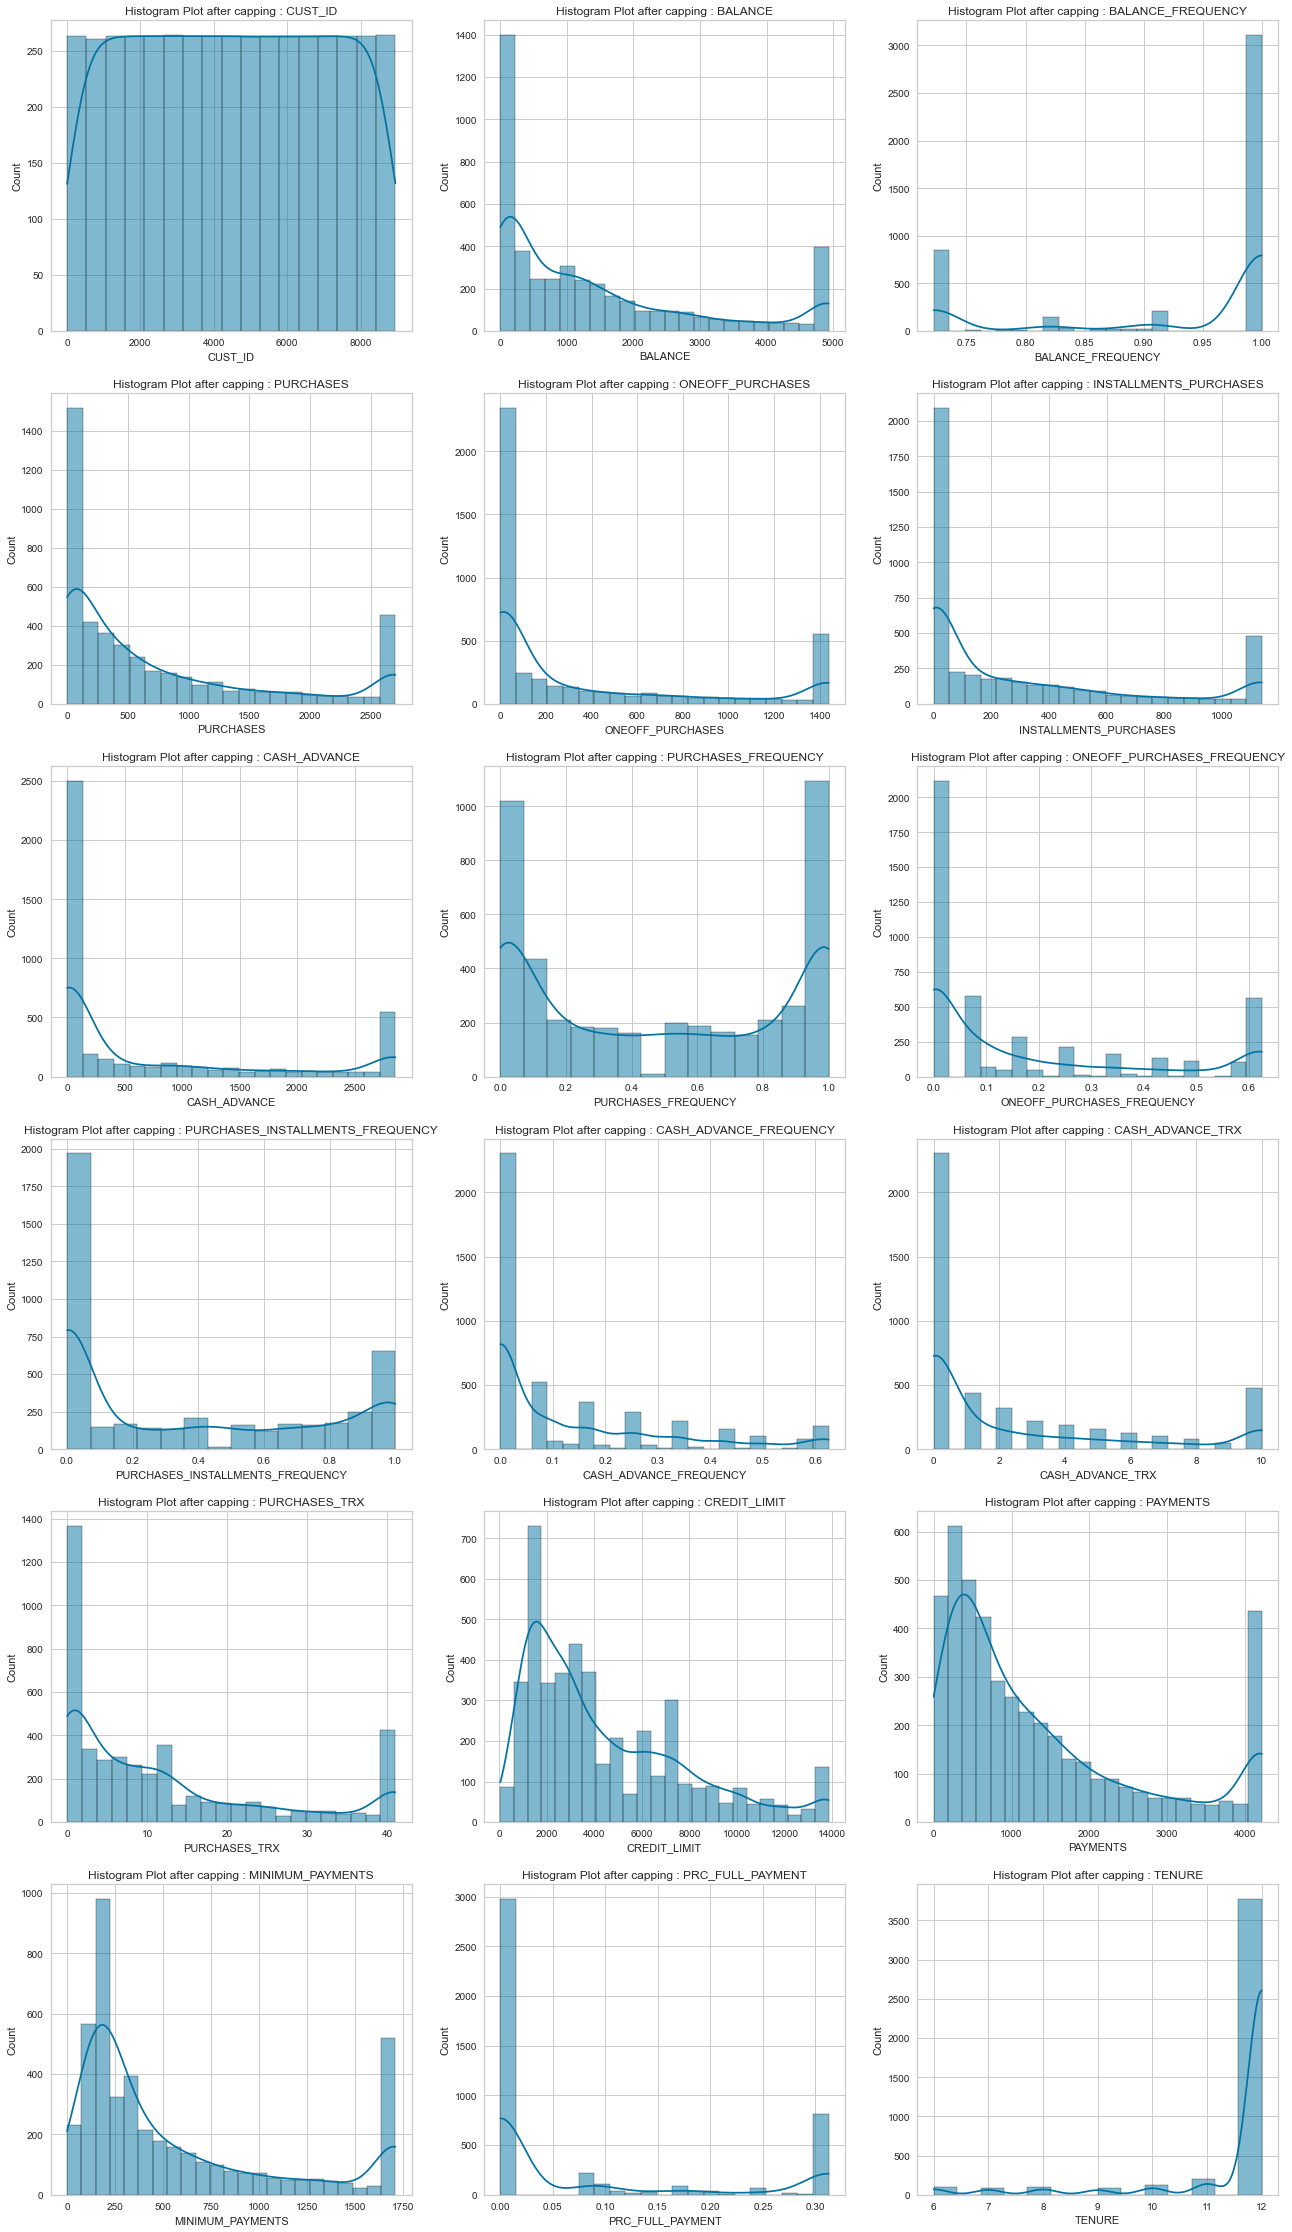

In [28]:
fig,axes=plt.subplots(nrows=6,ncols=3,figsize=(22,40))
i=0
j=0
for col in data_caps.columns:
    sns.histplot(data=data_caps, x=col, fill=True,ax=axes[i][j], kde=True).set(title='Histogram Plot after capping : '+col)
    j+=1
    if j>2:
        i+=1
        j=0
    if i==6:
        break

Terlihat bahwa data sudah memiliki distribusi lebih baik daripada sebelum dilakukan capping.

## 5.5 Feature Selection

Pada bagian ini, saya akan melakukan drop terhadap kolom CUST_ID, karena data ini adalah nomor unique client yang tidak berhubungan dengan proses clustering

In [29]:
data_caps=data_caps.drop(['CUST_ID'], axis=1)

## 5.6 Feature Scaling

Untuk melanjutkan tahapan feature scaling, dilakukan ekstraksi data numerikal

In [30]:
data_caps.keys()

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [31]:
data_caps.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185           0.722223      45.00             45.00   
1    0.000000           0.722223     176.03            176.03   
2  757.964752           0.875000     157.40            157.40   
3  264.566591           0.722223    1150.00           1150.00   
4  440.613643           1.000000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0            1.0         500.0   
1                     0.0               0.0            1.0        7000.0   
2                     0.0               0.0            6.0        1200.0   
3                     0.0               0.0            1.0        1200.0   
4                     0.0               0.0            1.0        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000        314.307392               0.0       8  
1     0.000000        314.307392               0.0       8  
2  1494.480376       1709.198458               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

Karena semua data terdistribusi tidak normal (skew) maka akan digunakan min-max scaler

In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_caps)

In [33]:
scaled_data.shape

(4470, 17)

telah dilakukan data scaling menggunakan minmax scaler

## 5.6 Cek VIF (Variance Inflation Factor)

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_caps.columns
  
# calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(scaled_data.values, i) for i in range(len(data_caps.columns))]
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(len(data_caps.columns))]

vif_data

feature        VIF
0                            BALANCE  10.593300
1                  BALANCE_FREQUENCY   6.419334
2                          PURCHASES  28.075819
3                   ONEOFF_PURCHASES  16.338466
4             INSTALLMENTS_PURCHASES  11.463339
5                       CASH_ADVANCE   5.336015
6                PURCHASES_FREQUENCY  25.488215
7         ONEOFF_PURCHASES_FREQUENCY  10.212793
8   PURCHASES_INSTALLMENTS_FREQUENCY  22.041637
9             CASH_ADVANCE_FREQUENCY  11.580588
10                  CASH_ADVANCE_TRX  12.880221
11                     PURCHASES_TRX  11.518540
12                      CREDIT_LIMIT   4.568731
13                          PAYMENTS   4.296653
14                  MINIMUM_PAYMENTS   7.848791
15                  PRC_FULL_PAYMENT   2.157024
16                            TENURE   7.062133

- Berdasarkan perhitungan VIF hampir semua memiliki nilai tinggi.
- dari 17 Kolom yang memiliki VIF rendah adalah 3 kolom yaitu PRC_FULL_PAYMENT, PAYMENTS, CREDIT_LIMIT
- diprediksi jika dilakuka dimensionality reduction dengan PCA kemungkinan dapat direduksi sebanyak 14 komponen.

## 5.7 Cek EVR dengan menggunakan PCA

In [35]:
pca_evr = PCA(n_components=17).fit(scaled_data)

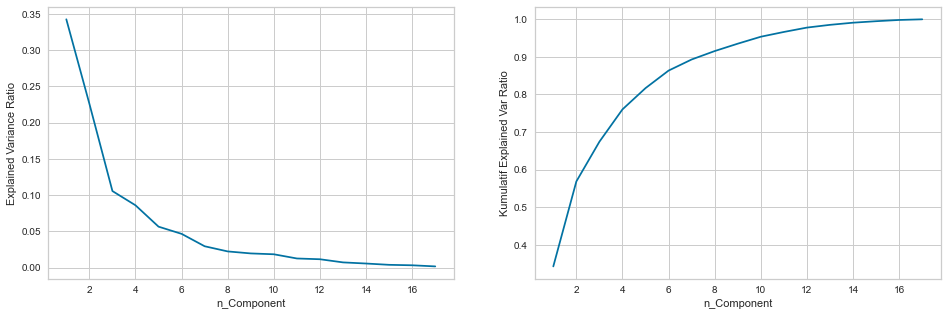

In [36]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca_evr.explained_variance_ratio_)
ax[0].set_xlabel('n_Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca_evr.explained_variance_ratio_))
ax[1].set_xlabel('n_Component')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [37]:
pca_evr.explained_variance_ratio_

array([0.3425411 , 0.22610269, 0.10567843, 0.08603281, 0.05656334,
       0.04664292, 0.02953819, 0.02241835, 0.01965672, 0.01848442,
       0.01269017, 0.01163414, 0.0072908 , 0.00573026, 0.0039342 ,
       0.00329773, 0.00176372])

In [38]:
np.cumsum(pca_evr.explained_variance_ratio_)

array([0.3425411 , 0.56864379, 0.67432223, 0.76035504, 0.81691838,
       0.8635613 , 0.89309949, 0.91551784, 0.93517456, 0.95365898,
       0.96634915, 0.97798329, 0.98527409, 0.99100435, 0.99493855,
       0.99823628, 1.        ])

- Pada gambar diatas (kiri) dapat terlihat bahwa nilai EVR semakin menurun sepanjang pertambahan komponen
- Terdapat 2 patahan pada grafik EVR :
    - pada n_component = 2, namun pada jumlah ini memiliki kumulatif evr yang cukup rendah (+/- 56%)
    - pada n_component = 5, pada evr ini nilai kumulatif EVR adalah sekitar 85%
    - pada n_component = 6, dengan jumlah komponen ini nilai EVR cukup baik (91%)
-  Penulis akan menggunakan n_component = 6 untuk melakukan dimensionality reduction.

## 5.8 Dimensionality Reduction dengan PCA

In [39]:
pca6comp = PCA(n_components=6)
pca6comp.fit(scaled_data)
hasil_pca_6 = pca6comp.transform(scaled_data)
hasil_pca_6

array([[-0.70842413, -0.84841519,  0.33162659, -0.03763793,  0.51659615,
         0.28140317],
       [-0.63937266, -0.74555682,  0.42900428,  0.00370398,  0.56273003,
         0.12874542],
       [-0.55889072, -0.19704345,  0.18440739, -0.34635545,  0.32116649,
        -0.1757246 ],
       ...,
       [-1.05766102,  0.35354453, -0.1234672 ,  0.07156164, -0.3466199 ,
         0.45788479],
       [-1.11516922,  0.39032673, -0.15221385,  0.13261877, -0.35865643,
         0.55275565],
       [-0.98440969,  0.95674733, -0.03015681,  0.16664711, -0.15890618,
         0.11986842]])

---
# 6. Clustering and Analysis

Pada penelitian ini, akan dilakukan unsupervised learning (clustering) dan membandingkan performa serta hasil dengan menggunakan model :

- K-means 
- Spectral Clustering

## **Kmeans**

**Tuning Menggunakan Elbow Method**

In [40]:
k = 10
kmeans_per_n = [KMeans(n_clusters=k, random_state=12).fit(hasil_pca_6)for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_n]

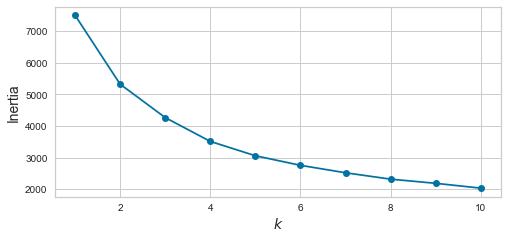

In [41]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


Berdasarkan hasil visualisasi elbow rule, didapatkan bahwa terjadi patahan saat k atau **n_cluster=2**. 
atas dasar ini, penulis akan menentukan bahwa jumlah cluster dengan kmeans berdasarkan fitur hasil pca adalah berjumlah **3 kluster**.

**Tuning menggunakan Silhouette Score**

In [42]:
silhouette_scores1 = [silhouette_score(hasil_pca_6, models.labels_)for models in kmeans_per_n[1:]]

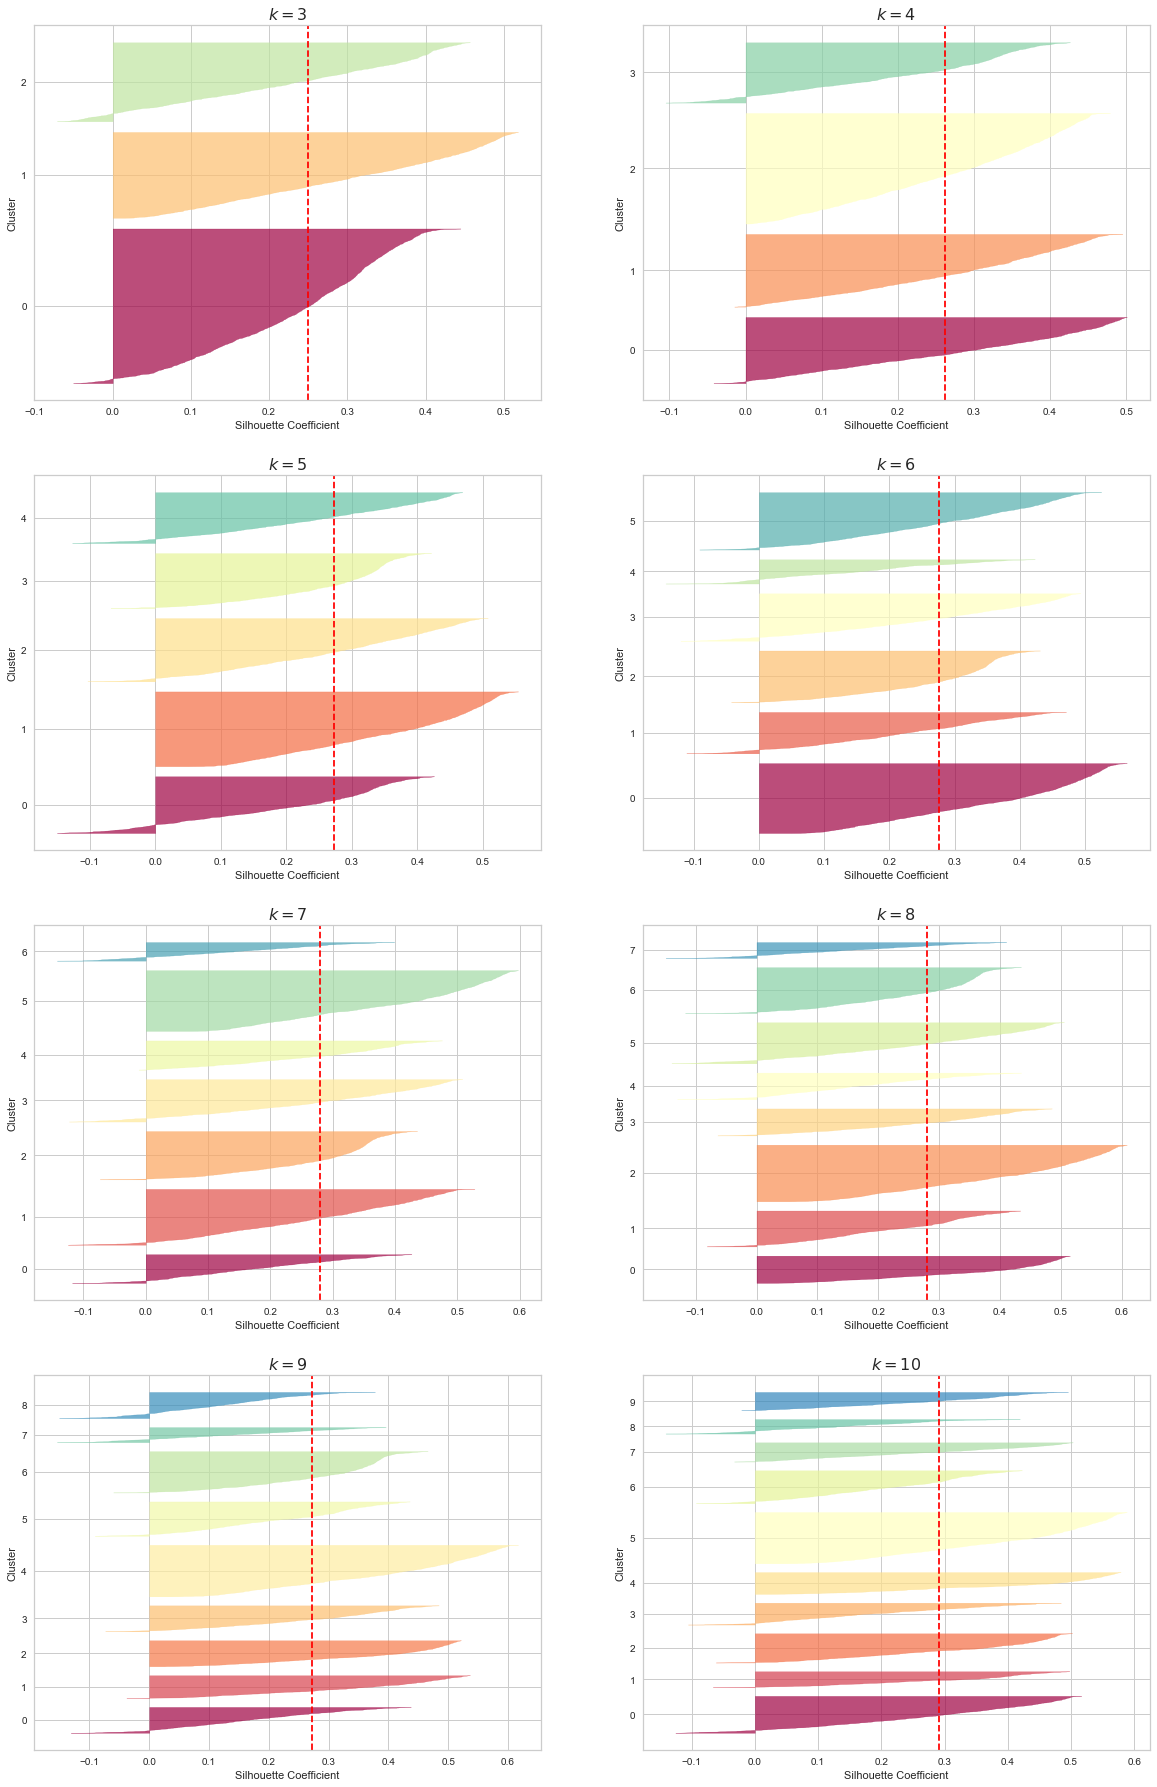

In [43]:
plt.figure(figsize=(20, 40))

for k in tuple(np.arange(3, 11)):
    plt.subplot(5, 2, k - 2)
    
    y_pred = kmeans_per_n[k - 1].labels_
    silhouette_coefficients = silhouette_samples(hasil_pca_6, y_pred)

    padding = len(hasil_pca_6) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    # if k in (3, 5):
    plt.ylabel("Cluster")
    
    # if k in (5, 6):
        # plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    # else:
    plt.tick_params()

    plt.axvline(x=silhouette_scores1[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

Berdasarkan visualisasi dari silhouette score diatas, akan dipilih **5** karena semua cluster telah melewati mean silhouette score dan memiliki bentuk yang relatif sama pada setiap clusternya.

**Clustering Kmeans Berdasarkan Cluster yang dipilih**

In [44]:
Kmeans5cluster = KMeans(n_clusters=5, random_state=12)
fix_kmeans = Kmeans5cluster.fit(hasil_pca_6)
clustering1 = Kmeans5cluster.predict(hasil_pca_6)

In [45]:
clustering1

array([3, 3, 1, ..., 4, 4, 4])

## **Spectral Clustering**

**Tuning Menggunakan Elbow Method**

In [46]:
k = 10
spectral_per_n = [SpectralClustering(n_clusters=k, random_state=12).fit(hasil_pca_6)for k in range(1, 11)]
# inertias1 = [model.inertia_ for model in spectral_per_n]

In [47]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 11), inertias1, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.show()


Berdasarkan hasil visualisasi elbow rule, didapatkan bahwa terjadi patahan saat k atau **n_cluster=2**. 
atas dasar ini, penulis akan menentukan bahwa jumlah cluster dengan kmeans berdasarkan fitur hasil pca adalah berjumlah **3 kluster**.

**Tuning menggunakan Silhouette Score**

In [48]:
silhouette_scores2 = [silhouette_score(hasil_pca_6, models.labels_)for models in spectral_per_n[1:]]

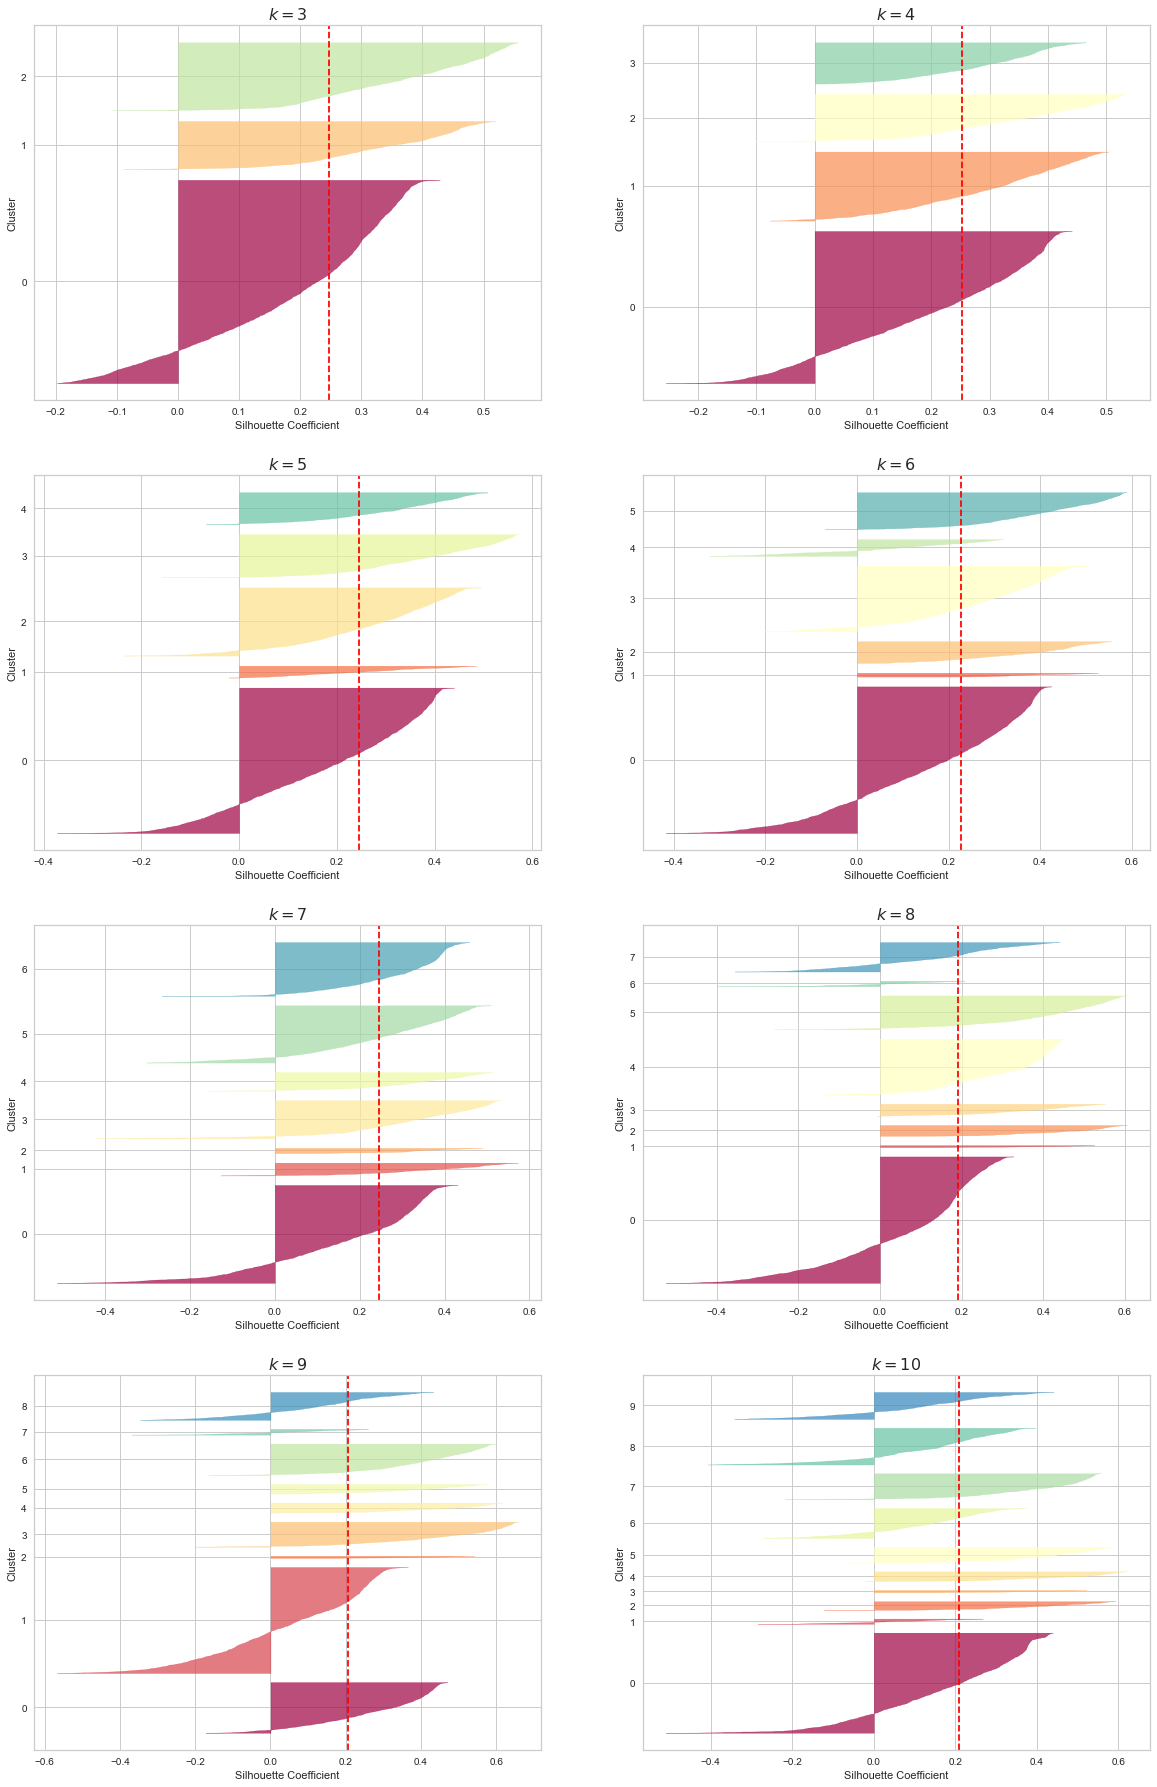

In [49]:
plt.figure(figsize=(20, 40))

for k in tuple(np.arange(3, 11)):
    plt.subplot(5, 2, k - 2)
    
    y_pred = spectral_per_n[k - 1].labels_
    silhouette_coefficients = silhouette_samples(hasil_pca_6, y_pred)

    padding = len(hasil_pca_6) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    # if k in (3, 5):
    plt.ylabel("Cluster")
    
    # if k in (5, 6):
        # plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    # else:
    plt.tick_params()

    plt.axvline(x=silhouette_scores2[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

Berdasarkan visualisasi dari silhouette score diatas, akan dipilih **n_cluster=4** karena semua cluster telah melewati mean silhouette score dan memiliki bentuk yang seimbang antar clusternya.

**Clustering dengan Spectral Clustering dengan cluster yang ditentukan sebelumnya**

In [50]:
spectral4cluster = SpectralClustering(n_clusters=4, random_state=12)
clustering2 = spectral4cluster.fit_predict(hasil_pca_6)

In [51]:
clustering2

array([0, 0, 0, ..., 2, 2, 2])

---
# 8. Model Evaluation

Berikut ini akan dilakukan visualisasi hasil cluster dalam ruang dua dimensi pada kmeans dan spectral clustering

dibawah ini akan dilakukan fit_transform dengan model yang telah ditentukan pada setiap algoritma clustering :

In [52]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(hasil_pca_6)
pca_df1 = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df1["Cluster(Kmeans)"] = clustering1 + 1
pca_df2 = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df2["Cluster(Spectral)"] = clustering2 + 1

In [53]:
pca_df1

x1        x2  Cluster(Kmeans)
0    -0.708424 -0.848415                4
1    -0.639373 -0.745557                4
2    -0.558891 -0.197043                2
3    -0.263369 -0.497905                4
4    -0.418576 -0.437914                2
...        ...       ...              ...
4465 -1.149302  1.409127                5
4466 -1.115556  0.364593                5
4467 -1.057661  0.353545                5
4468 -1.115169  0.390327                5
4469 -0.984410  0.956747                5

[4470 rows x 3 columns]

In [54]:
pca_df2

x1        x2  Cluster(Spectral)
0    -0.708424 -0.848415                  1
1    -0.639373 -0.745557                  1
2    -0.558891 -0.197043                  1
3    -0.263369 -0.497905                  1
4    -0.418576 -0.437914                  1
...        ...       ...                ...
4465 -1.149302  1.409127                  3
4466 -1.115556  0.364593                  3
4467 -1.057661  0.353545                  3
4468 -1.115169  0.390327                  3
4469 -0.984410  0.956747                  3

[4470 rows x 3 columns]

[Text(0.5, 1.0, 'Hasil Clustering Spectral')]

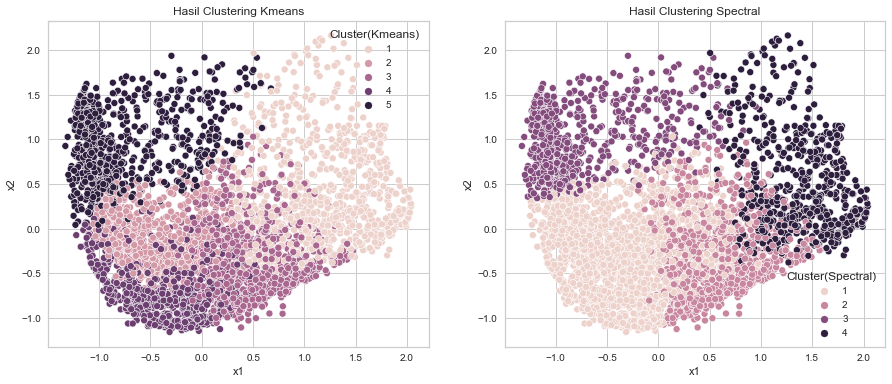

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(data=pca_df1, x="x1", y="x2", hue='Cluster(Kmeans)').set(title='Hasil Clustering Kmeans')
plt.subplot(122)
sns.scatterplot(data=pca_df2, x="x1", y="x2", hue='Cluster(Spectral)').set(title='Hasil Clustering Spectral')

- Algoritma K-means menghasilkan 5 cluster namun terdapat banyak sekali antar cluster yang terbentuk, terutama pada cluster 2 yang menumpuk keempat cluster lainnya.
- Algoritma Spectral Clustering menghasilkan 4 cluster dengan pemisahan antar cluster yang sedikit cukup baik daripada algoritma K-means.

**Langkah selanjutnya adalah melakukan predict cluster terhadap hasil pca terbaik dan menganalisa hasil prediksi kluster tersebut.**

In [56]:
full_preds1 = Kmeans5cluster.predict(hasil_pca_6)
full_preds2 = spectral4cluster.fit_predict(hasil_pca_6)
data_after_clustered1 = data.copy()
data_after_clustered2 = data.copy()
data_after_clustered1['Cluster_kmeans'] = full_preds1 + 1
data_after_clustered2['Cluster_spectral'] = full_preds2 + 1

In [57]:
data_after_clustered1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4465     2345  9629.808851              1.000       0.00              0.00   
4466     6785  1040.030221              1.000       0.00              0.00   
4467     7347  1322.818587              1.000       0.00              0.00   
4468     8447  1060.391273              1.000       0.00              0.00   
4469     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4465                     0.0   4372.393835             0.000000   
4466                     0.0   1390.648290             0.000000   
4467                     0.0    762.301096             0.000000   
4468                     0.0   1475.858013             0.000000   
4469                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4465                    0.000000                               0.0   
4466                    0.000000                               0.0   
4467                    0.000000                               0.0   
4468                    0.000000                               0.0   
4469                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4465                0.545455                 9              0       12000.0   
4466                0.545455                18              0        1400.0   
4467                0.545455                11              0        1500.0   
4468                0.545455                10              0        2000.0   
4469                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_kmeans  
0        0.000000        314.307392               0.0       8               4  
1        0.000000        314.307392               0.0       8               4  
2     1494.480376       2638.598410               0.0       8               2  
3     3029.380326         85.428885               0.0       8               4  
4      215.316424        137.846006               0.0       8             

In [58]:
data_after_clustered2

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4465     2345  9629.808851              1.000       0.00              0.00   
4466     6785  1040.030221              1.000       0.00              0.00   
4467     7347  1322.818587              1.000       0.00              0.00   
4468     8447  1060.391273              1.000       0.00              0.00   
4469     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4465                     0.0   4372.393835             0.000000   
4466                     0.0   1390.648290             0.000000   
4467                     0.0    762.301096             0.000000   
4468                     0.0   1475.858013             0.000000   
4469                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4465                    0.000000                               0.0   
4466                    0.000000                               0.0   
4467                    0.000000                               0.0   
4468                    0.000000                               0.0   
4469                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4465                0.545455                 9              0       12000.0   
4466                0.545455                18              0        1400.0   
4467                0.545455                11              0        1500.0   
4468                0.545455                10              0        2000.0   
4469                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        0.000000        314.307392               0.0       8   
1        0.000000        314.307392               0.0       8   
2     1494.480376       2638.598410               0.0       8   
3     3029.380326         85.428885               0.0       8   
4      215.316424        137.846006               0.0       8   
...           ...               ...               ...     ...   
4465  2468.988022  

**Analisa hasil setiap cluster yang terbentuk dengan menggunakan facet grid (Kmeans 5 Cluster)**

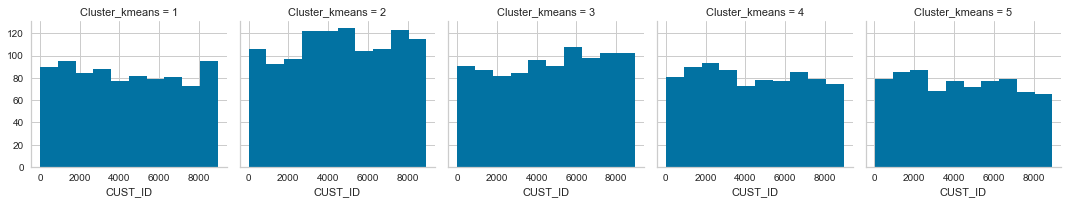

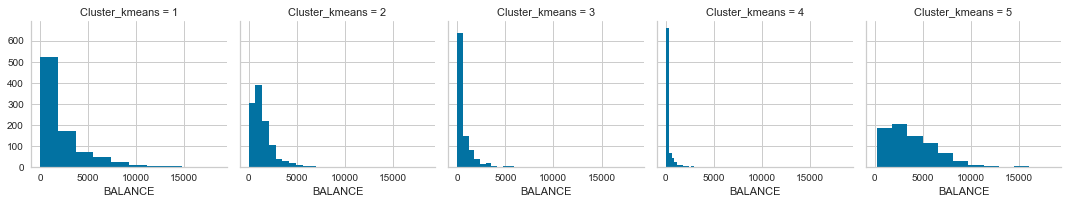

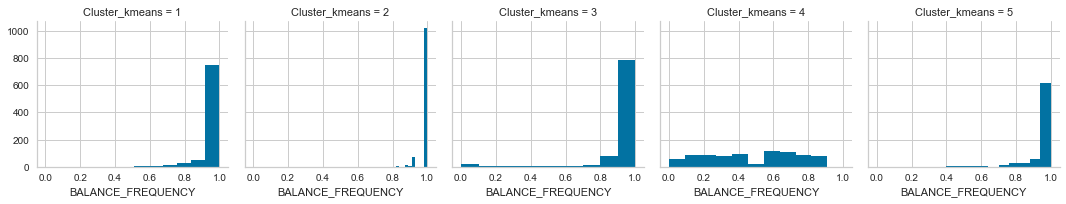

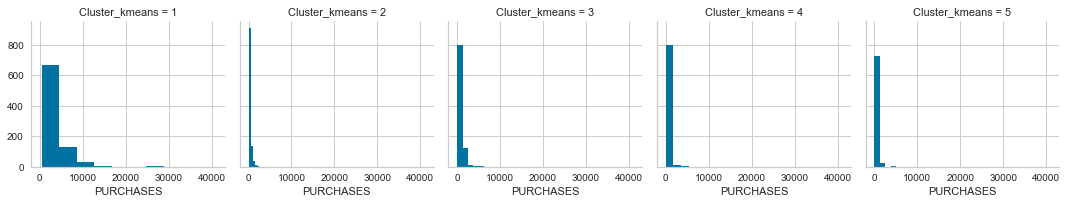

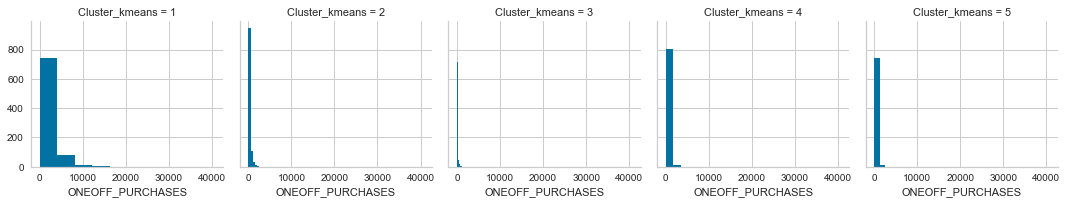

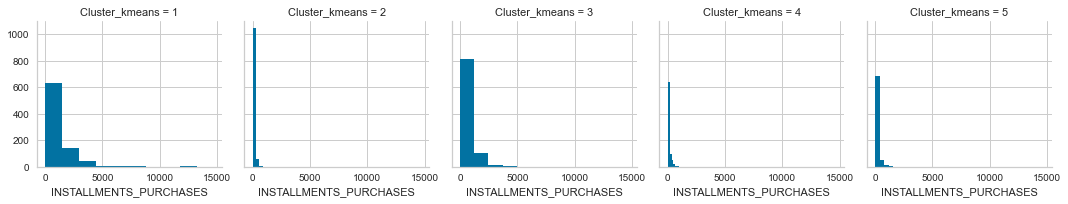

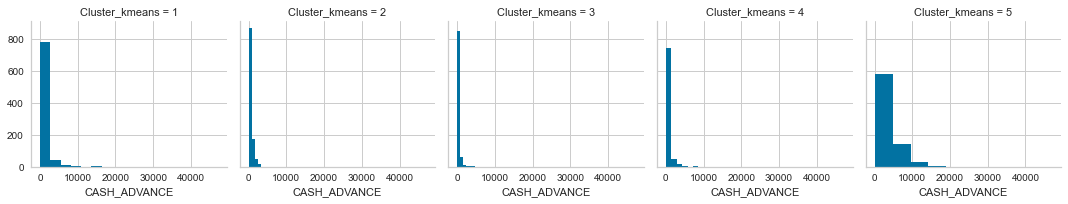

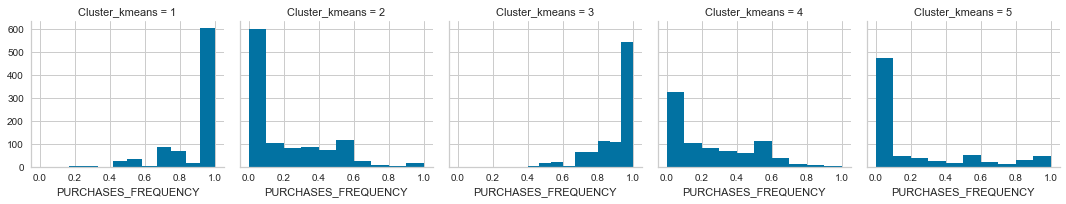

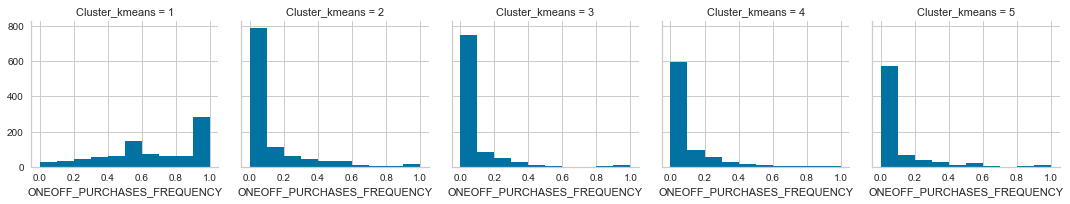

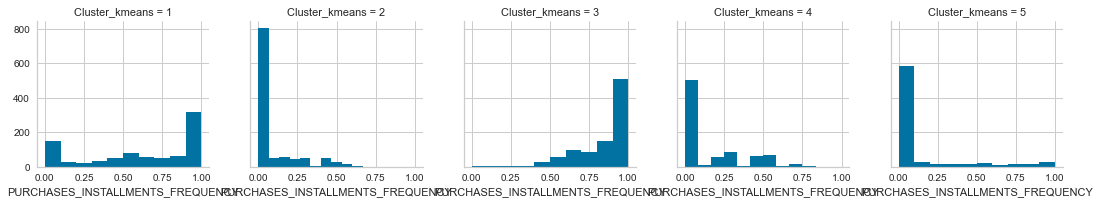

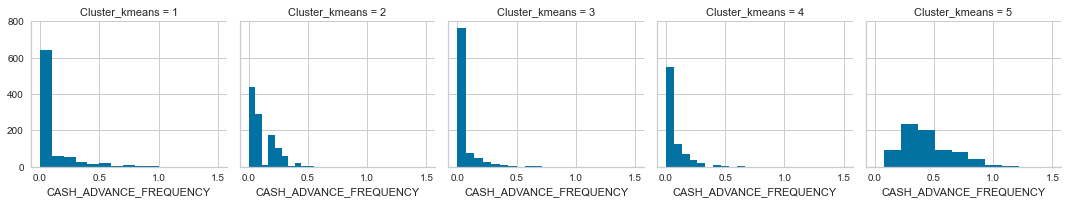

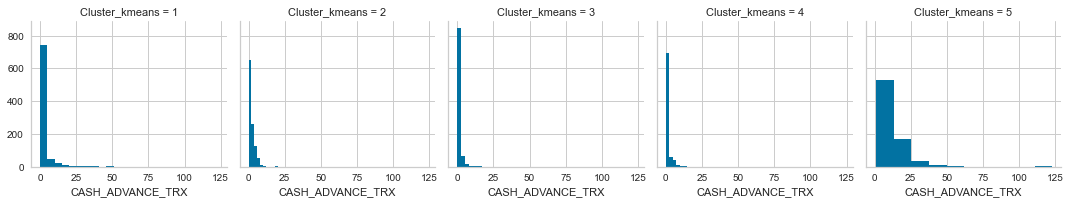

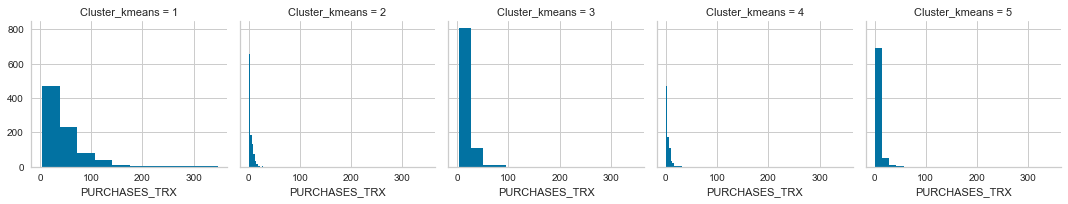

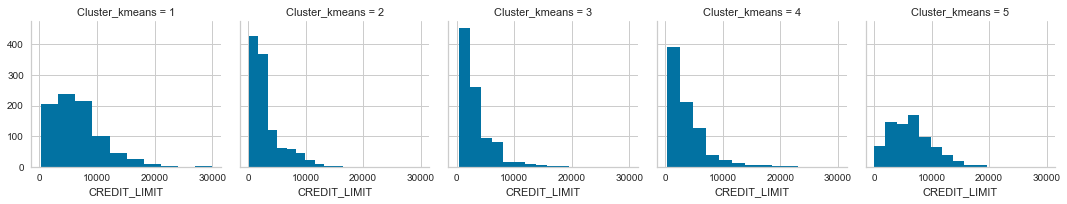

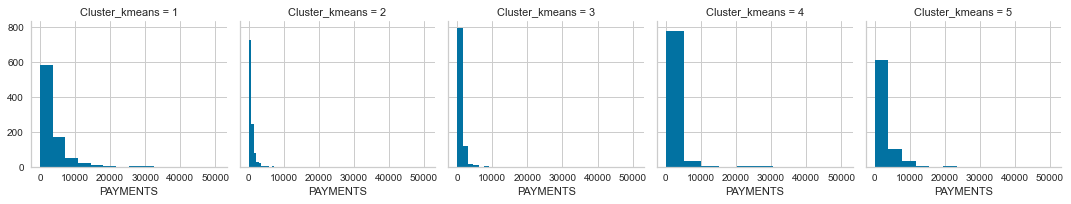

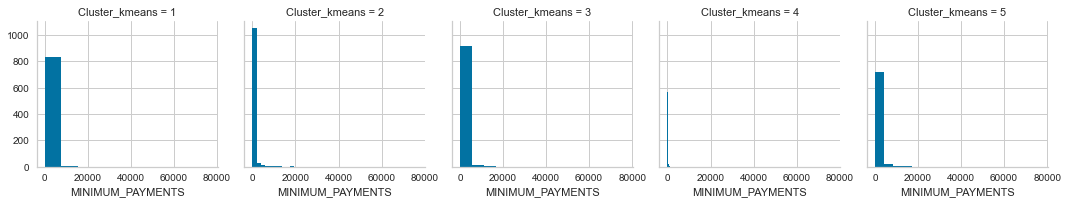

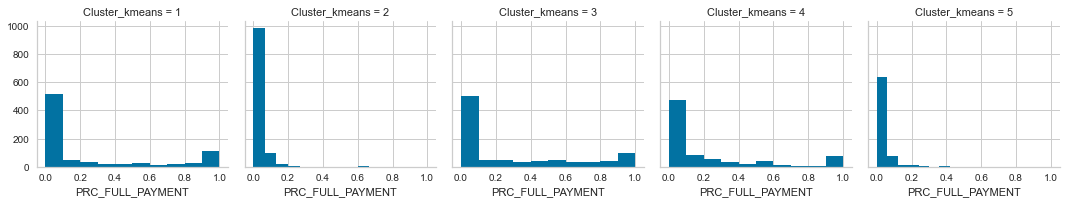

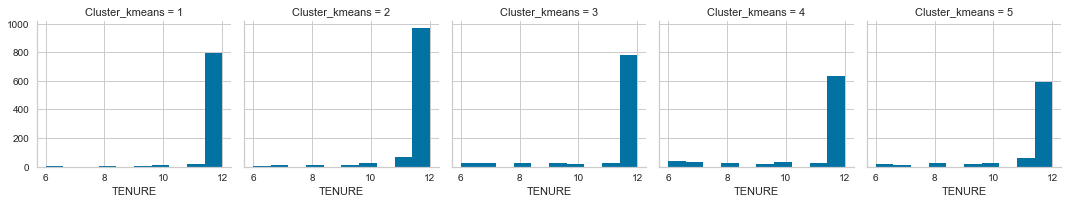

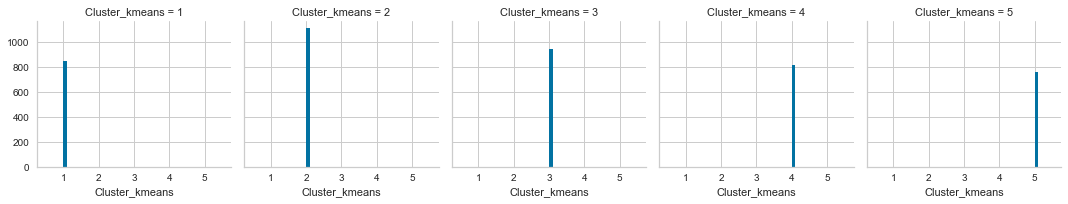

In [59]:
for c in data_after_clustered1:
    grid= sns.FacetGrid(data_after_clustered1, col='Cluster_kmeans')
    grid.map(plt.hist, c)

**Statement hasil Kmeans**

Cluster 1 : Client yang cenderung sering melakukan pembelian dengan kartu kredit baik dicicil ataupun tidak dengan jumlah yang cukup tinggi dan jarang melakukan pengambilan uang tunai, cluster ini memiliki credit limit yang tinggi. 
- Balance Medium
- Purchases cukup tinggi
- Puchases Frequency tinggi
- One off purchase frequency tinggi
- jarang melakukan cash advance
- purchases installment frequency merata (rendah-tinggi)
- memiliki credit limit lebih tinggi


Cluster 2 : Cluster ini memiliki balance medium, dengan jumlah dan frekuensi pembelian dengan kartu kredit yang rendah serta sangat jarang mengambil uang tunai, cluster ini memilki credit limit yang rendah.
- Balance Medium
- Purchases sangat sedikit
- Purchase Frequency rendah
- One off purchase frequency rendah
- jarang melakukan cash advance
- purchases installment frequency rendah
- memiliki credit limit lebih rendah

Cluster 3 : Cluster ini memiliki balance medium yang sering melakukan pembelian dengan kartu kredit namun dengan jumlah yang tidak banyak dan jarang melakukan pengambilan uang tunai, cluster ini memiliki credit limit yang rendah.
- Balance Medium
- Purchases sedang
- Puchases Frequency tinggi
- One off purchase frequency rendah
- jarang melakukan cash advance
- purchases installment frequency rendah
- memiliki credit limit lebih rendah

Cluster 4 : Cluster ini memiliki balance yang rendah dengan frekuensi pembelian dengan kartu kredit namun dengan jumlah uang yang sedang, cluster ini jarang melakukan pengambilan uang tunai, dan memiliki credit limit yang rendah.
- Balance sangat rendah
- Purchases sedang
- Purchase Frequency rendah
- One off purchase frequency rendah
- jarang melakukan cash advance
- purchases installment frequency rendah
- memiliki credit limit lebih rendah

Cluster 5 : Cluster ini memiliki balance yang tinggi, dengan frekuensi pembelian dengan kartu kredit namun dengan jumlah uang yang sedang sama dengan cluster 4, tetapi cluster ini sering melakukan pengambilan uangtunai sehingga memiliki credit limit yang tinggi.
- Balance tinggi
- Purchases sedang
- Purchase Frequency rendah
- One off purchase frequency rendah
- Lebih sering melakukan cash advance
- purchases installment frequency rendah
- memiliki credit limit lebih tinggi

**Analisa hasil setiap cluster yang terbentuk dengan menggunakan facet grid (Spectral 4 Cluster)**

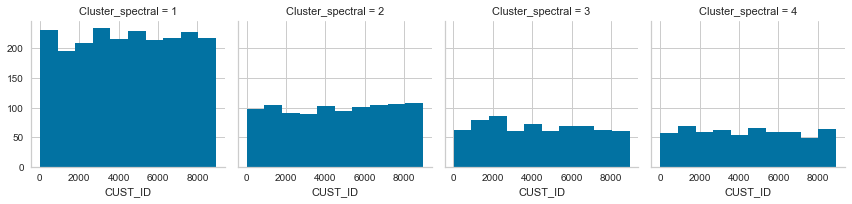

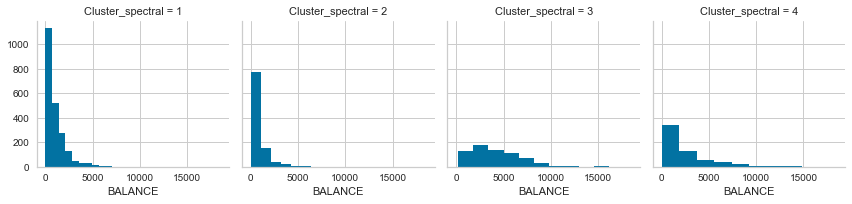

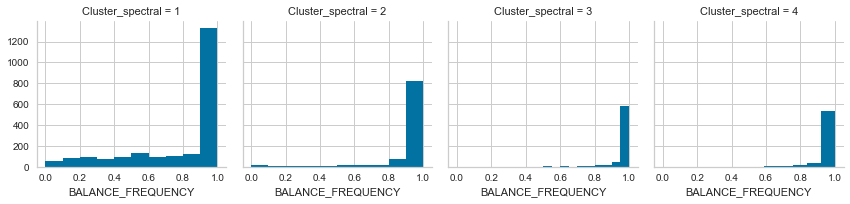

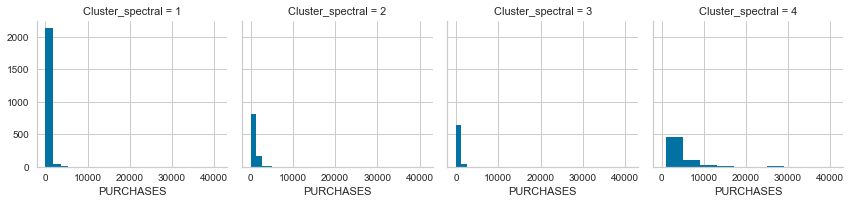

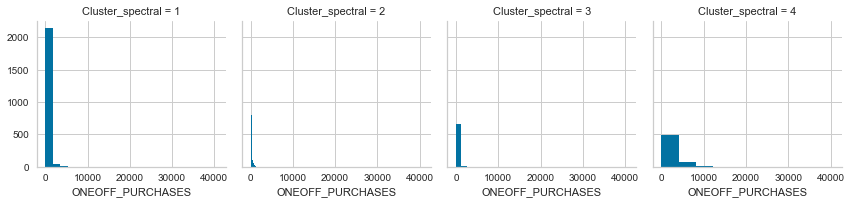

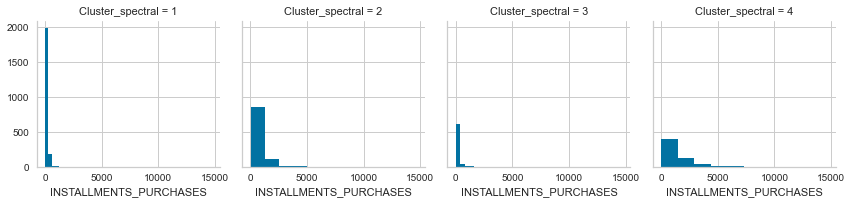

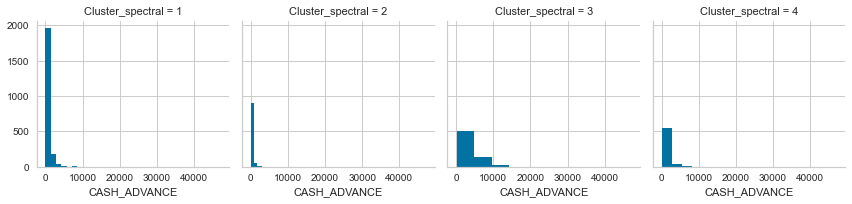

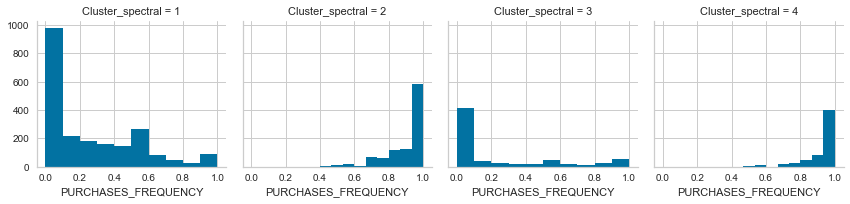

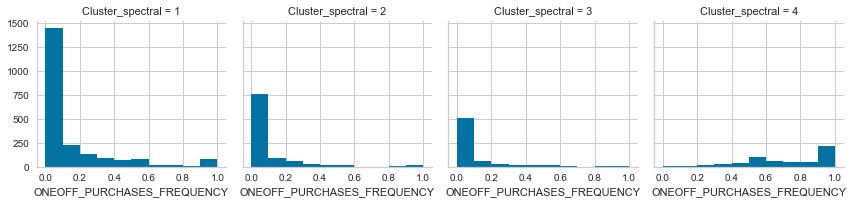

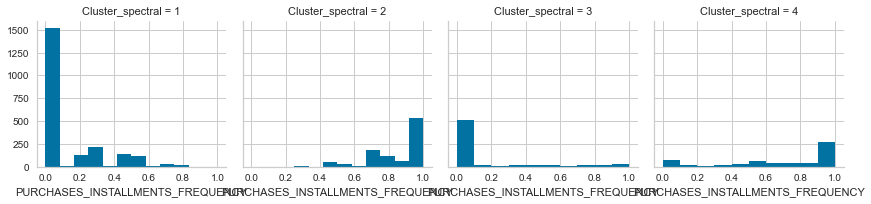

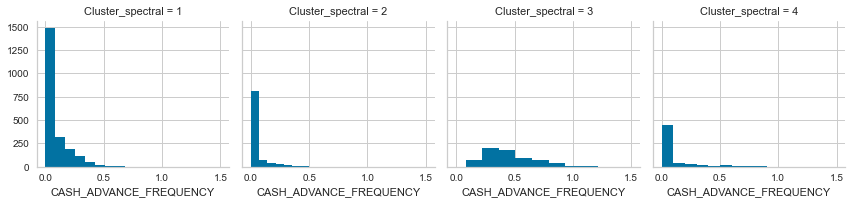

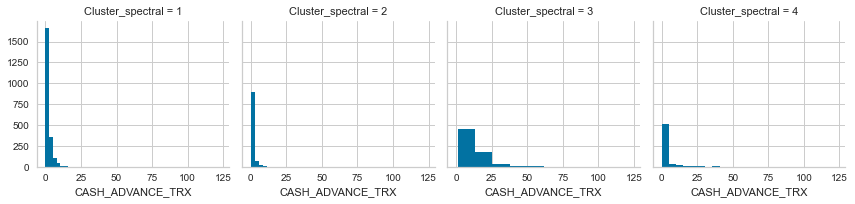

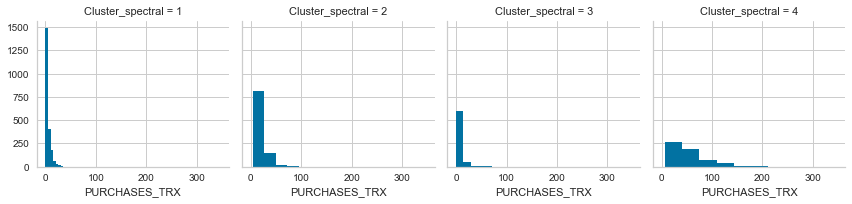

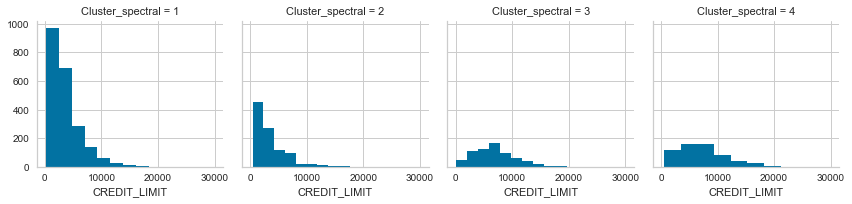

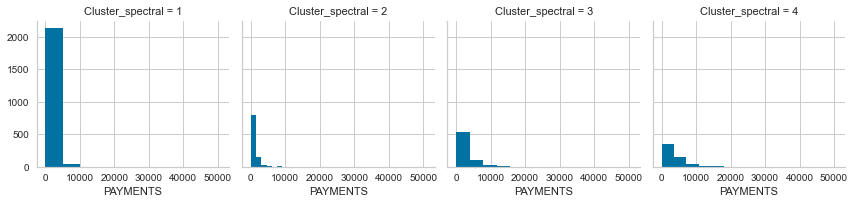

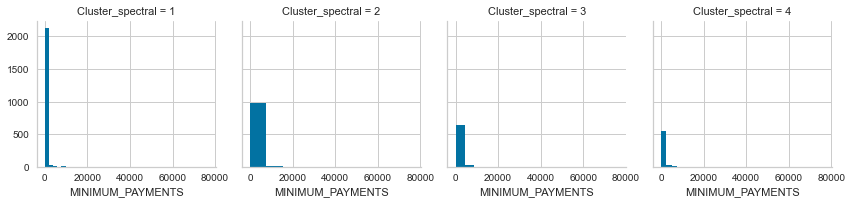

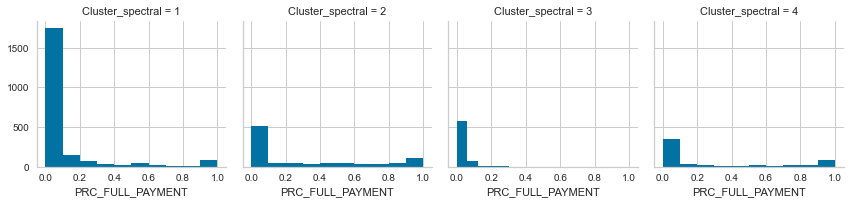

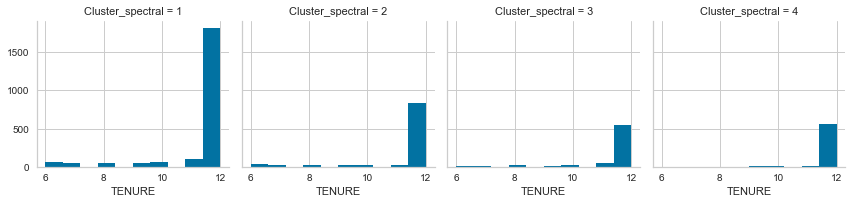

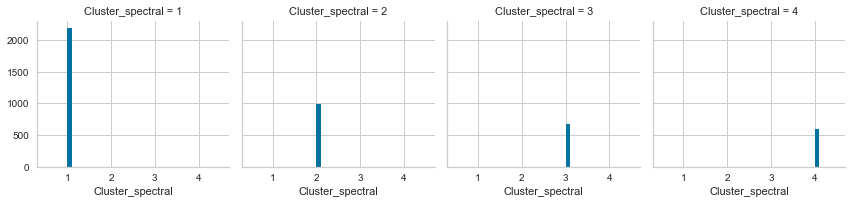

In [60]:
for c in data_after_clustered2:
    grid= sns.FacetGrid(data_after_clustered2, col='Cluster_spectral')
    grid.map(plt.hist, c)

**Statement Hasil Spectral Clustering**

Cluster 1 : Cluster ini cenderung sangat jarang melakukan pembelian menggunakan kartu kredit (tipe pengguna kartu kredit paling pasif)
- Purchase frequency jarang
- One off freq rendah
- Purchase installments jarang

Cluster 2 : cluster ini sering melakukan pembelian barang dengan harga yang tidak terlalu tinggi secara langsung maupun dicicil dengan kartu kredit. (tipe pengguna kartu kredit yang aktif dengan jumlah purchase yang rendah)
- Purchase frequency sering
- One off freq rendah
- Purchase installments sering

Cluster 3 : luster ini cenderung sangat jarang melakukan pembelian barang tetapi sering mengambil uang tunai menggunakan kartu kredit. (Tipe yang menggunakan kartu kredit untuk mengambil uang tunai) 
- Purchase frequency jarang
- One off freq rendah
- Purchase installments jarang
- Cash advance lebih sering daripada cluster lainnya

Cluster 4 : cluster ini sering melakukan pembelian barang dengan harga yang tinggi secara langsung maupun dicicil dengan kartu kredit. (tipe pengguna kartu kredit yang aktif dengan jumlah purchase yang tinggi)
- Purchase frequency sering
- One off freq tinggi
- Purchase installments merata (medium)

---
# 9. Model Inference

Cek data inference

In [61]:
data_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      735    26.485924           1.000000     256.44              0.00   
1     6241  2571.311375           1.000000       0.00              0.00   
2     5099   347.226798           1.000000    1535.49           1203.69   
3      913     9.074142           0.888889     555.66              0.00   
4      363    93.964086           1.000000     815.34            149.04   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  256.44      0.000000             0.666667   
1                    0.00   6537.278532             0.000000   
2                  331.80      0.000000             0.900000   
3                  555.66      0.000000             1.000000   
4                  666.30      0.000000             0.916667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                          0.666667   
1                        0.00                          0.000000   
2                        0.50                          0.500000   
3                        0.00                          0.888889   
4                        0.25                          0.750000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             12        1500.0   
1                0.583333                16              0        3000.0   
2                0.000000                 0             24        1000.0   
3                0.000000                 0              9        1500.0   
4                0.000000                 0             14        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   235.328971        162.324595          0.166667      12  
1  4513.686142        583.336071          0.100000      12  
2   778.913464        149.966517          0.250000      10  
3   547.194469          2.167809          0.000000       9  
4   361.786239        125.693866          0.300000      12

Drop kolom CUST_ID Seperti yang dilakukan pada preprocessing

In [62]:
data_inf = data_inf.drop(['CUST_ID'], axis=1)

Dilakukan Scaling dengan minmax scaler

In [63]:
scaled_inf = scaler.transform(data_inf)

Dimension reduction dengan menggunakan PCA

In [64]:
inf_reduction = pca6comp.transform(scaled_inf)

Dilakukan clustering berdasarkan kedua model yang telah dibuat.

In [65]:
inf_cluster_k = Kmeans5cluster.predict(inf_reduction)
inf_cluster_s = spectral4cluster.fit_predict(inf_reduction)

Memasukan hasil kedalam dataframe yang sama dengan data inference untuk dapat membandingkan hasil klustering.

In [66]:
data_inf["Cluster_Kmeans"] = inf_cluster_k + 1
data_inf["Cluster_Spectral"] = inf_cluster_s + 1
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    26.485924           1.000000     256.44              0.00   
1  2571.311375           1.000000       0.00              0.00   
2   347.226798           1.000000    1535.49           1203.69   
3     9.074142           0.888889     555.66              0.00   
4    93.964086           1.000000     815.34            149.04   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  256.44      0.000000             0.666667   
1                    0.00   6537.278532             0.000000   
2                  331.80      0.000000             0.900000   
3                  555.66      0.000000             1.000000   
4                  666.30      0.000000             0.916667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                          0.666667   
1                        0.00                          0.000000   
2                        0.50                          0.500000   
3                        0.00                          0.888889   
4                        0.25                          0.750000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             12        1500.0   
1                0.583333                16              0        3000.0   
2                0.000000                 0             24        1000.0   
3                0.000000                 0              9        1500.0   
4                0.000000                 0             14        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_Kmeans  \
0   235.328971        162.324595          0.166667      12               3   
1  4513.686142        583.336071          0.100000      12               5   
2   778.913464        149.966517          0.250000      10               1   
3   547.194469          2.167809          0.000000       9               3   
4   361.786239        125.693866          0.300000      12               3   

   Cluster_Spectral  
0                 2  
1                 1  
2                 4  
3                 3  
4                 2

Data Inference telah berhasil dilakukan clustering dengan model yang telah dibuat.

---
# 10. Pengambilan Kesimpulan

1. Setelah dilakukan proses clustering dengan menggunakan dua algoritma yaitu Kmeans dan Spectral Clustering, didapatkan hasil cluster optimal yang berbeda untuk setiap model algoritma yang digunakan. Jumlah cluster pada Kmeans adalah **5 cluster** dan pada spectral clustering adalah **4 cluster.**

2. Berikut adalah kesimpulan setiap cluster berdasarkan hasil dari masing-masing algoritma clustering yang digunakan.

2.1. **Statement hasil Kmeans**

- Cluster 1 : Client yang cenderung sering melakukan pembelian dengan kartu kredit baik dicicil ataupun tidak dengan jumlah yang cukup tinggi dan jarang melakukan pengambilan uang tunai, cluster ini memiliki credit limit yang tinggi. 



- Cluster 2 : Cluster ini memiliki balance medium, dengan jumlah dan frekuensi pembelian dengan kartu kredit yang rendah serta sangat jarang mengambil uang tunai, cluster ini memilki credit limit yang rendah.


- Cluster 3 : Cluster ini memiliki balance medium yang sering melakukan pembelian dengan kartu kredit namun dengan jumlah yang tidak banyak dan jarang melakukan pengambilan uang tunai, cluster ini memiliki credit limit yang rendah.


- Cluster 4 : Cluster ini memiliki balance yang rendah dengan frekuensi pembelian dengan kartu kredit namun dengan jumlah uang yang sedang, cluster ini jarang melakukan pengambilan uang tunai, dan memiliki credit limit yang rendah.


- Cluster 5 : Cluster ini memiliki balance yang tinggi, dengan frekuensi pembelian dengan kartu kredit namun dengan jumlah uang yang sedang sama dengan cluster 4, tetapi cluster ini sering melakukan pengambilan uangtunai sehingga memiliki credit limit yang tinggi.


2.2. **Statement Hasil Spectral Clustering**
- Cluster 1 : Cluster ini cenderung sangat jarang melakukan pembelian menggunakan kartu kredit (tipe pengguna kartu kredit paling pasif).


- Cluster 2 : cluster ini sering melakukan pembelian barang dengan harga yang tidak terlalu tinggi secara langsung maupun dicicil dengan kartu kredit. (tipe pengguna kartu kredit yang aktif dengan jumlah purchase yang rendah).

- Cluster 3 : luster ini cenderung sangat jarang melakukan pembelian barang tetapi sering mengambil uang tunai menggunakan kartu kredit. (Tipe yang menggunakan kartu kredit untuk mengambil uang tunai). 

- Cluster 4 : cluster ini sering melakukan pembelian barang dengan harga yang tinggi secara langsung maupun dicicil dengan kartu kredit. (tipe pengguna kartu kredit yang aktif dengan jumlah purchase yang tinggi).

3. CONCEPTUAL PROBLEM

    1. **Apakah yang dimaksud dengan inertia pada algoritma K-Means ?**
    
        Inersia pada Kmeans berfungsi untuk mengukur sebarapa baik dataset dapat diklusterisasi oleh algoritma Kmeans, nilai ini dihitung dengan mengukur jarak antar titik data dengan centroidnya, kemudian jarak dipangkatkan, dan dijumlahkan pada satu cluster yang sama. model K-means yang bagus adalah yang memiliki inertia yang rendah dan jumlah K yang rendah.


    2. **Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**

        Elbow method adalah metode sederhana yang digunakan pada algoritma K-means untuk mencari jumlah kluster terbaik berdasarkan grafik yang terbentuk. elbow method dapat diaplikasikan dengan cara melakukan plotting nilai inertia (Y) dari setiap n_cluster (X) yang digunakan pada algoritma K-means. Dalam menggunakan metode ini terdapat bias dalam pemilihan n_cluster terbaik, semakin banyan cluster maka jarak dengan centroid akan berkurang dan inersia akan selalu turun, sehingga dalam memilih cluster akan dipilih jumlah cluster paling minimum dengan inersia yang cukup rendah.

    3. **Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !**
        
        - K-means adalah algoritma yang simple dan bergantung pada jarak centroid yang terbentuk berdasarkan cluster yang telah ditentukan, dengan kecepatan clustering yang cukup baik. Tetapi algoritma ini sensitif terhadap inisialisasi dan outliers.

        - Spectral Clustering ini memanfaatkan spektrum atau nilai eigen dari similarity matrix pada data untuk melakukan dimensionality reduction sebelum dilakukan clustering di dimensi yang lebih rendah. Algoritma ini dapat memiliki performa baik pada data dengan bentuk yang beragam, seperti K-means algoritma ini membutuhkan pemilihan nilai cluster(k), namun algoritma ini membutuhkan waktu komputasi yang lama saat melakukan clustering.